**Problem Statement: How can we combine conventional clinical indicators with ECG-derived features to more accurately and accessibly predict heart disease?**


Our dataset emphasizes non-invasive, ECG-derived features—notably ExerciseAngina and ST Slope. With the rise of wearable ECG devices, these features offer a low-cost approach to early risk prediction.


-> Heart disease often detected using invasive techniques eg blood tests, cholesterol checks, or chest X-rays<br>
-> We wanted to know whether non-invasive ECG-derived features, where it could accurately predict heart disease<br>
-> We hope to validate if ECG features could offer reliable predictions<br>


In [ ]:
###Execute this code if run in google colab

#from google.colab import drive
#drive.mount('/content/drive')


#!ls '/content/drive/MyDrive/YourFileName'

**Attribute information<br>**

Age: age of the patient [years]<br>

Sex: sex of the patient [M: Male, F: Female]<br>

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>

RestingBP: resting blood pressure [mg Hg]<br>

Cholesterol: serum cholesterol [mg/dl]<br>

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]<br>

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br>
-> chest pain or discomfort that occurs specifically when the heart doesn't get enough oxygen-rich blood, often during physical activity
-> this is measured by measured primarily using an exercise stress test, which monitors the heart's response to exertion using ECG

Oldpeak: oldpeak = ST [Numeric value measured in depression]<br>
-> degree of ST-segment depression observed on an electrocardiogram (ECG) during exercise, relative to the resting state
-> measured in millimeters or small units of voltage, that quantifies the amount of depression using ECG

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>
-> chest pain or discomfort that occurs during physical exertion or activity<br>

HeartDisease: output class [1: heart disease, 0: Normal]<br>


**References**<br>
https://www.nhs.uk/conditions/heart-attack/diagnosis/<br>
https://www.health.harvard.edu/heart-health/can-a-smart-watch-diagnose-a-heart-attack<br>
https://litfl.com/st-segment-ecg-library/<br>
https://www.mayoclinic.org/tests-procedures/ekg/about/pac-20384983<br>

**Source of the datsets**<br>
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data<br>

**Importing Library and datasets**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix,
                           classification_report, roc_curve, roc_auc_score,
                           precision_recall_curve, average_precision_score)
sns.set()

heartFailuredata = pd.read_csv('Heart Failure prediction datasets.csv')
#execute this if run in google colab 
#heartFailuredata = pd.read_csv('/content/drive/MyDrive/Heart_Disease_prediction_EL15_GroupB/Heart Failure prediction datasets.csv')
heartFailuredata.head(10)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


**Data Cleaning and Processing**

**Data types of the variables**

In [39]:
# Shape of the dataset
print("Dataset dimensions:", heartFailuredata.shape)
print()

# Data types and non-null counts
print(heartFailuredata.info())

Dataset dimensions: (918, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


**Changing data type**

In [40]:
#Han Wen's part
heartFailuredata['Sex'] = heartFailuredata['Sex'].astype('category')
heartFailuredata['ChestPainType'] = heartFailuredata['ChestPainType'].astype('category')
heartFailuredata['FastingBS'] = heartFailuredata['FastingBS'].astype('category')
heartFailuredata['RestingECG'] = heartFailuredata['RestingECG'].astype('category')
heartFailuredata['ExerciseAngina'] = heartFailuredata['ExerciseAngina'].astype('category')
heartFailuredata['HeartDisease'] = heartFailuredata['HeartDisease'].astype('category')
heartFailuredata['ST_Slope'] = heartFailuredata['ST_Slope'].astype('category')


print(heartFailuredata.dtypes[['Sex','ChestPainType','FastingBS', 'RestingECG','ExerciseAngina','ST_Slope','HeartDisease',]])

Sex               category
ChestPainType     category
FastingBS         category
RestingECG        category
ExerciseAngina    category
ST_Slope          category
HeartDisease      category
dtype: object


In [41]:
heartFailuredata.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


**Changing variables data to simpler words for better interpretation**

In [42]:
#Han Wen's part
heartFailuredata['FastingBS'] = heartFailuredata['FastingBS'].cat.rename_categories({0: 'Normal', 1: 'High'})
heartFailuredata['ExerciseAngina'] = heartFailuredata['ExerciseAngina'].cat.rename_categories({0: 'No', 1: 'Yes'})
heartFailuredata['HeartDisease'] = heartFailuredata['HeartDisease'].cat.rename_categories({0: 'No', 1: 'Yes'})

# Make sure the column is of categorical type
heartFailuredata['ST_Slope'] = heartFailuredata['ST_Slope'].astype('category')

# Rename categories
heartFailuredata['ST_Slope'] = heartFailuredata['ST_Slope'].cat.rename_categories({
    'Up': 'Normal',
    'Flat': 'Mild risk',
    'Down': 'High risk'
})


In [43]:
#Check data types again
print(heartFailuredata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(1), int64(4)
memory usage: 43.2 KB
None


**Checking of missing values from the variables**

In [ ]:
import pandas as pd
# Or alternatively:
missing_values = heartFailuredata.isnull()

# Display the first few rows of the boolean DataFrame
print(missing_values.head())

missing_count = heartFailuredata.isnull().sum()

print(missing_count)


     Age    Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0  False  False          False      False        False      False       False   
1  False  False          False      False        False      False       False   
2  False  False          False      False        False      False       False   
3  False  False          False      False        False      False       False   
4  False  False          False      False        False      False       False   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0  False           False    False     False         False  
1  False           False    False     False         False  
2  False           False    False     False         False  
3  False           False    False     False         False  
4  False           False    False     False         False  
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR        

**Checking of unique values for each variables**

In [ ]:
# Function to count unique values and sort them
def count_unique_values(heartFailuredata):
    for column in heartFailuredata.columns:
        unique_values = heartFailuredata[column].value_counts().sort_index()  # Sort by value for numerical columns
        print(f"Column: {column}")
        print(f"Number of unique values: {len(unique_values)}")
        print("Unique values and their counts (sorted):")
        print(unique_values)
        print("\n" + "="*50 + "\n")  # Separator for readability

# Run the function
count_unique_values(heartFailuredata)

Column: Age
Number of unique values: 50
Unique values and their counts (sorted):
Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: count, dtype: int64


Column: Sex
Number of unique values: 2
Unique values and their counts (sorted):
Sex
F    193
M    725
Name: count, dtype: int64


Column: ChestPainType
Number of unique values: 4
Unique values and their counts (sorted):
ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
Name: count, dtype: int64


Column: RestingBP
Number of unique values: 67
Unique values and their counts (sorted):
RestingBP
0       1
80      1
92      1
94  

**Removing invalid entries**

**Removal of a row with 1 zero entry in RestingBP**

In [ ]:
# Store shape before removal
before_shape = heartFailuredata.shape

# Remove rows where RestingBP == 0
heartFailuredata = heartFailuredata[heartFailuredata['RestingBP'] != 0]

# Store shape after removal
after_shape = heartFailuredata.shape

# Print comparison
print(f"Total number of rows and columns BEFORE removal: {before_shape[0]} rows, {before_shape[1]} columns")
print(f"Total number of rows and columns AFTER removal:  {after_shape[0]} rows, {after_shape[1]} columns")
print(f"Number of rows removed: {before_shape[0] - after_shape[0]}",'\n')

# Print unique values and their counts for RestingBP
unique_rbp = heartFailuredata['RestingBP'].value_counts().sort_index()
print(f"Column: RestingBP")
print(f"Number of unique values: {len(unique_rbp)}")
print("Unique values and their counts (sorted):")
print(unique_rbp)

Total number of rows and columns BEFORE removal: 918 rows, 12 columns
Total number of rows and columns AFTER removal:  917 rows, 12 columns
Number of rows removed: 1 

Column: RestingBP
Number of unique values: 66
Unique values and their counts (sorted):
RestingBP
80      1
92      1
94      2
95      6
96      1
       ..
180    12
185     1
190     2
192     1
200     4
Name: count, Length: 66, dtype: int64


**Replacing zero value entries in cholesterol**

Cholesterol value should never be zero. Thus, we take the mean value of the remaining other data and depended on whether the zero value entry has heart disease or not

In [ ]:
#Identify invalid cholesterol values
invalid_cholesterol_mask = heartFailuredata['Cholesterol'] == 0

# Ensure Cholesterol is float before assigning float values
heartFailuredata['Cholesterol'] = heartFailuredata['Cholesterol'].astype(float)

#Calculate mean cholesterol for each HeartDisease group (excluding zeros)
mean_cholesterol_by_hd = heartFailuredata[heartFailuredata['Cholesterol'] != 0].groupby('HeartDisease')['Cholesterol'].mean()

#Replace invalid (0) cholesterol values with the group-specific means
heartFailuredata.loc[invalid_cholesterol_mask, 'Cholesterol'] = heartFailuredata[invalid_cholesterol_mask] \
    .apply(lambda row: mean_cholesterol_by_hd[row['HeartDisease']], axis=1)

# Verify that there are no more zero values in Cholesterol
zero_cholesterol_count = (heartFailuredata['Cholesterol'] == 0).sum()
zero_cholesterol_count

# Print unique values and their counts for Cholesterol
unique_cho = heartFailuredata['Cholesterol'].value_counts().sort_index()
print(f"Column: Cholesterol")
print(f"Number of unique values: {len(unique_cho)}")
print("Unique values and their counts (sorted):")
print(unique_cho)


Column: Cholesterol
Number of unique values: 223
Unique values and their counts (sorted):
Cholesterol
85.0     1
100.0    2
110.0    1
113.0    1
117.0    1
        ..
491.0    1
518.0    1
529.0    1
564.0    1
603.0    1
Name: count, Length: 223, dtype: int64


C:\Users\Han Wen\AppData\Local\Temp\ipykernel_109036\3968917811.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_cholesterol_by_hd = heartFailuredata[heartFailuredata['Cholesterol'] != 0].groupby('HeartDisease')['Cholesterol'].mean()


**Checking of duplicated data in the variables**

In [ ]:
# Check for fully duplicated rows
duplicated_rows = heartFailuredata[heartFailuredata.duplicated(keep=False)]  # keep=False marks all duplicates

# Count the number of duplicated rows
num_duplicated_rows = len(duplicated_rows)

# Display the results
if num_duplicated_rows > 0:
    print(f"There are {num_duplicated_rows} fully duplicated rows in the dataset.")
    print("Here are the duplicated rows:")
    print(duplicated_rows.sort_values(by=heartFailuredata.columns.tolist()))  # Sort for easier comparison
else:
    print("No duplicated rows found in the dataset.")

No duplicated rows found in the dataset.


**Checking of outliers and skewness**

Skewness and Outliers

Feature         Skewness   # Outliers   % of Data 
--------------------------------------------------
Age             -0.20      0            0.00%
RestingBP       0.61       27           2.94%
Cholesterol     1.31       41           4.47%
MaxHR           -0.14      2            0.22%


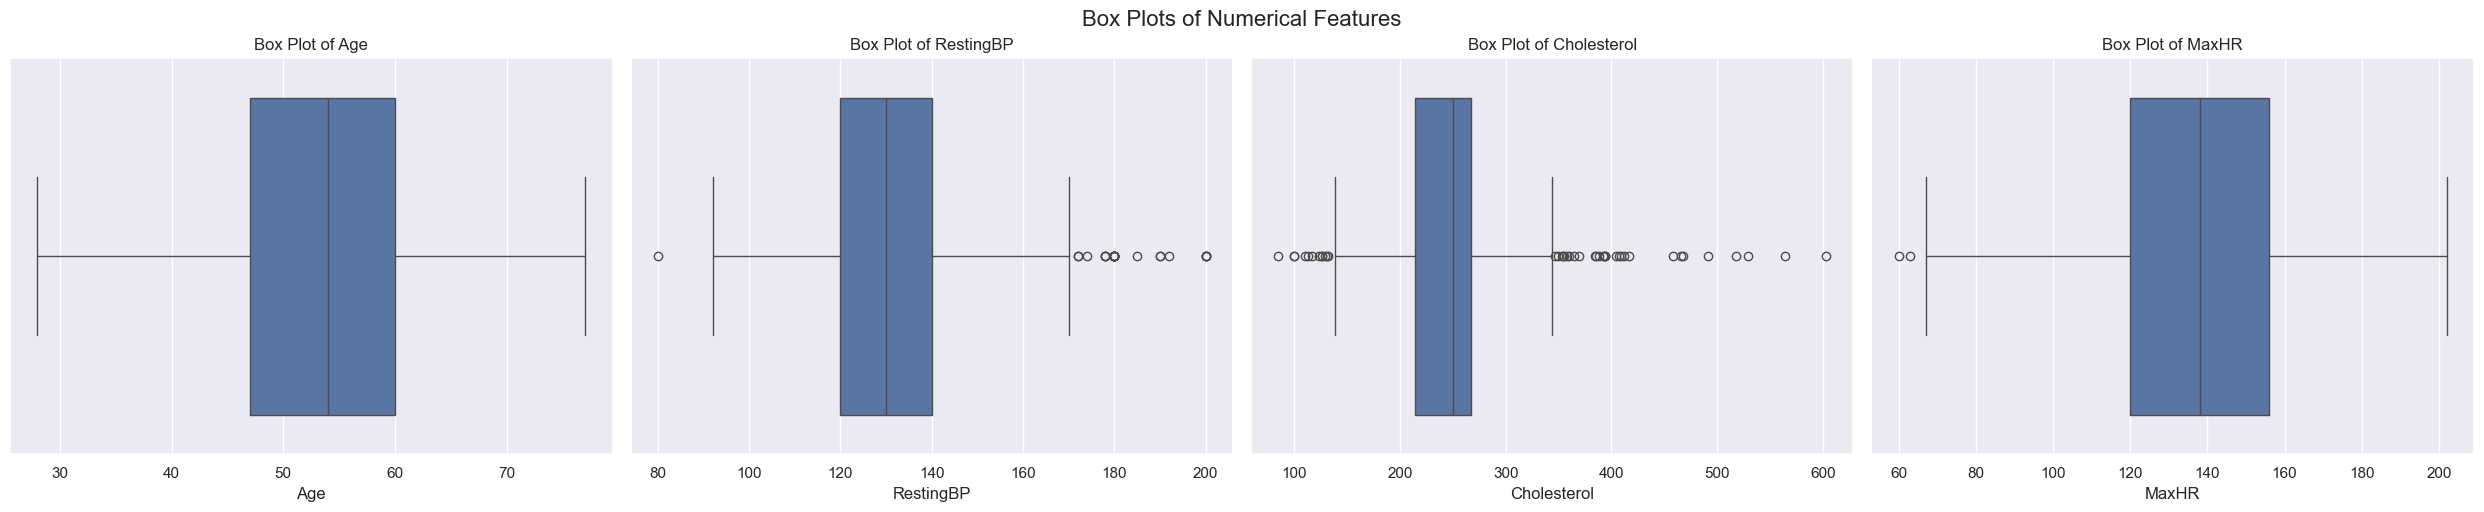

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew

#labeling the varibles for the boxplots
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']
skewness_info = {}
outlier_info = {}

for i, col in enumerate(numerical_cols):
    # Skewness
    skew_val = skew(heartFailuredata[col])
    skewness_info[col] = skew_val

    # IQR method for outliers
    Q1 = heartFailuredata[col].quantile(0.25)
    Q3 = heartFailuredata[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = heartFailuredata[(heartFailuredata[col] < lower) | (heartFailuredata[col] > upper)]
    outlier_info[col] = len(outliers)

    # Creation of Table
print("Skewness and Outliers\n")
print(f"{'Feature':<15} {'Skewness':<10} {'# Outliers':<12} {'% of Data':<10}")
print("-" * 50)

for col in numerical_cols:
    skew_val = skewness_info[col]
    outlier_count = outlier_info[col]
    percent_outliers = outlier_count / len((heartFailuredata)) * 100
    print(f"{col:<15} {skew_val:<10.2f} {outlier_count:<12} {percent_outliers:<.2f}%")

#Visualize with box plot
plt.figure(figsize=(25, 5))  # Adjust size as needed

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 4, i)  # 2 rows, 3 columns (adjust if you have more features)
    sns.boxplot(x=heartFailuredata[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.suptitle('Box Plots of Numerical Features', fontsize=16, y=1.02)
plt.show()


Based on the percentage of outliers in our data which is less than 5%, we will not remove it as it indicates important information


**Visualizing the distribution and outliers with KDE after data cleaning**

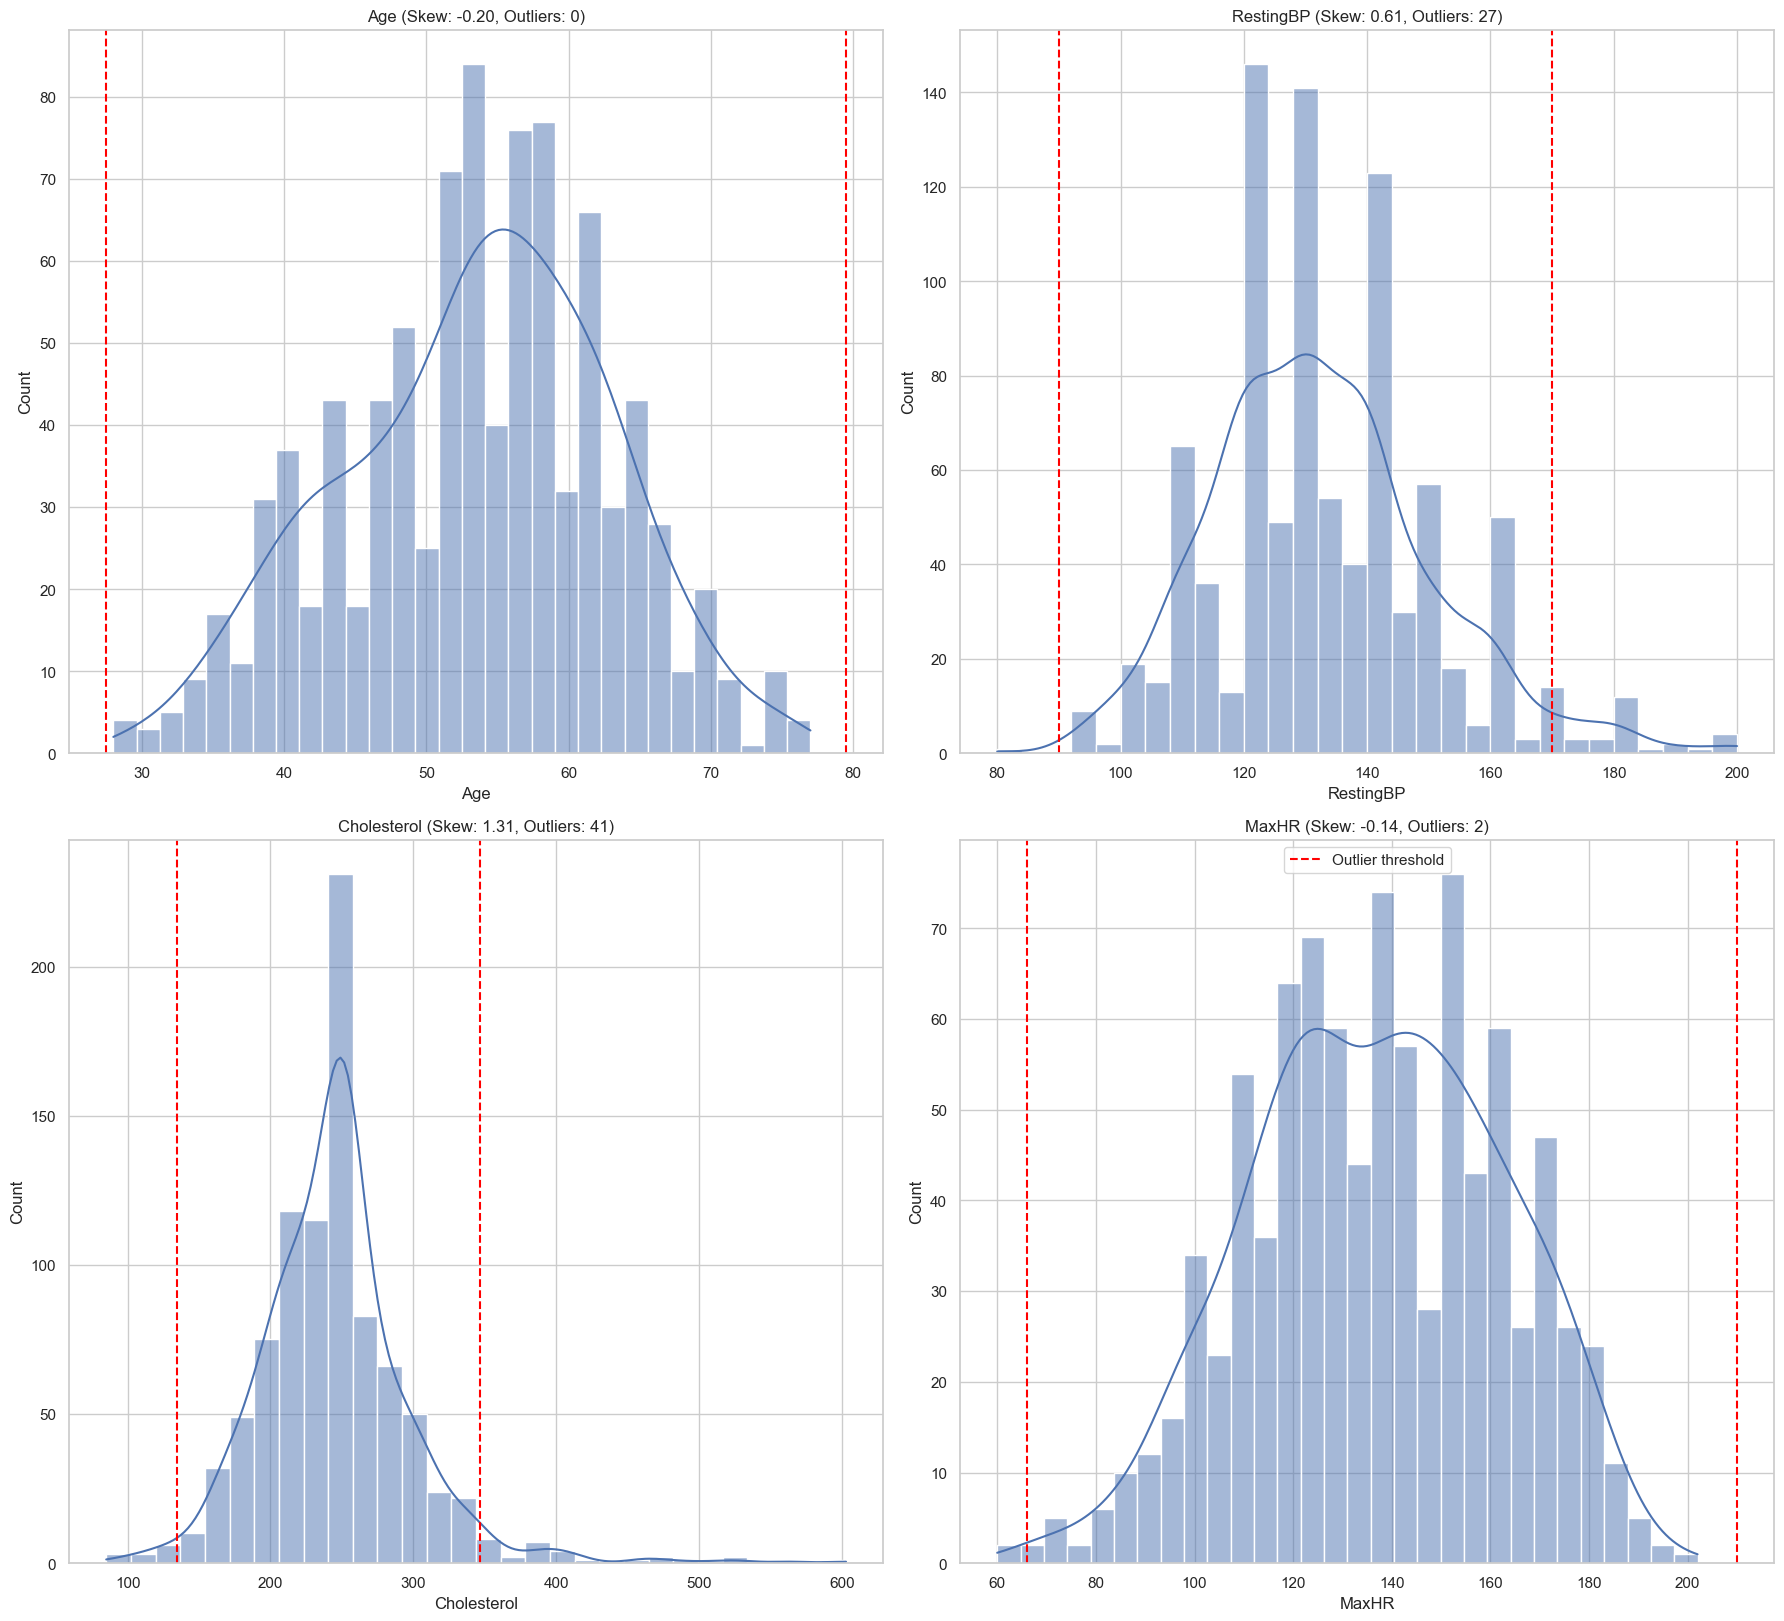

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 24))


for i, col in enumerate(numerical_cols):
    # Skewness
    skew_val = skew(heartFailuredata[col])
    skewness_info[col] = skew_val

    # IQR method for outliers
    Q1 = heartFailuredata[col].quantile(0.25)
    Q3 = heartFailuredata[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = heartFailuredata[(heartFailuredata[col] < lower) | (heartFailuredata[col] > upper)]

    outlier_info[col] = len(outliers)

    # Plot
    plt.subplot(3, 2, i+1)
    sns.histplot(heartFailuredata[col], kde=True, bins=30)
    plt.axvline(lower, color='red', linestyle='--', label='Outlier threshold')
    plt.axvline(upper, color='red', linestyle='--')
    plt.title(f"{col} (Skew: {skew_val:.2f}, Outliers: {len(outliers)})")

plt.legend()
plt.tight_layout()
plt.show()


Based on the graph, despite cholesterol having the highest amount of skew in a certain range. We decided not to remove it as the skewness falls within the acceptable range. Moreover as cholesterol is an important indication of heart disease, we will retain its original values


**Exploratory Data Analysis**

**Numerical Data**

In [51]:
heartFailuredata_num = pd.DataFrame(heartFailuredata[['Age', 'RestingBP','Cholesterol','MaxHR','Oldpeak']])
heartFailuredata_num.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,245.565666,136.789531,0.886696
std,9.437636,17.999749,53.409819,25.467129,1.066960
min,28.000000,80.000000,85.000000,60.000000,-2.600000
25%,47.000000,120.000000,214.000000,120.000000,0.000000
50%,54.000000,130.000000,250.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


**Statistical visualization of numerical variables**

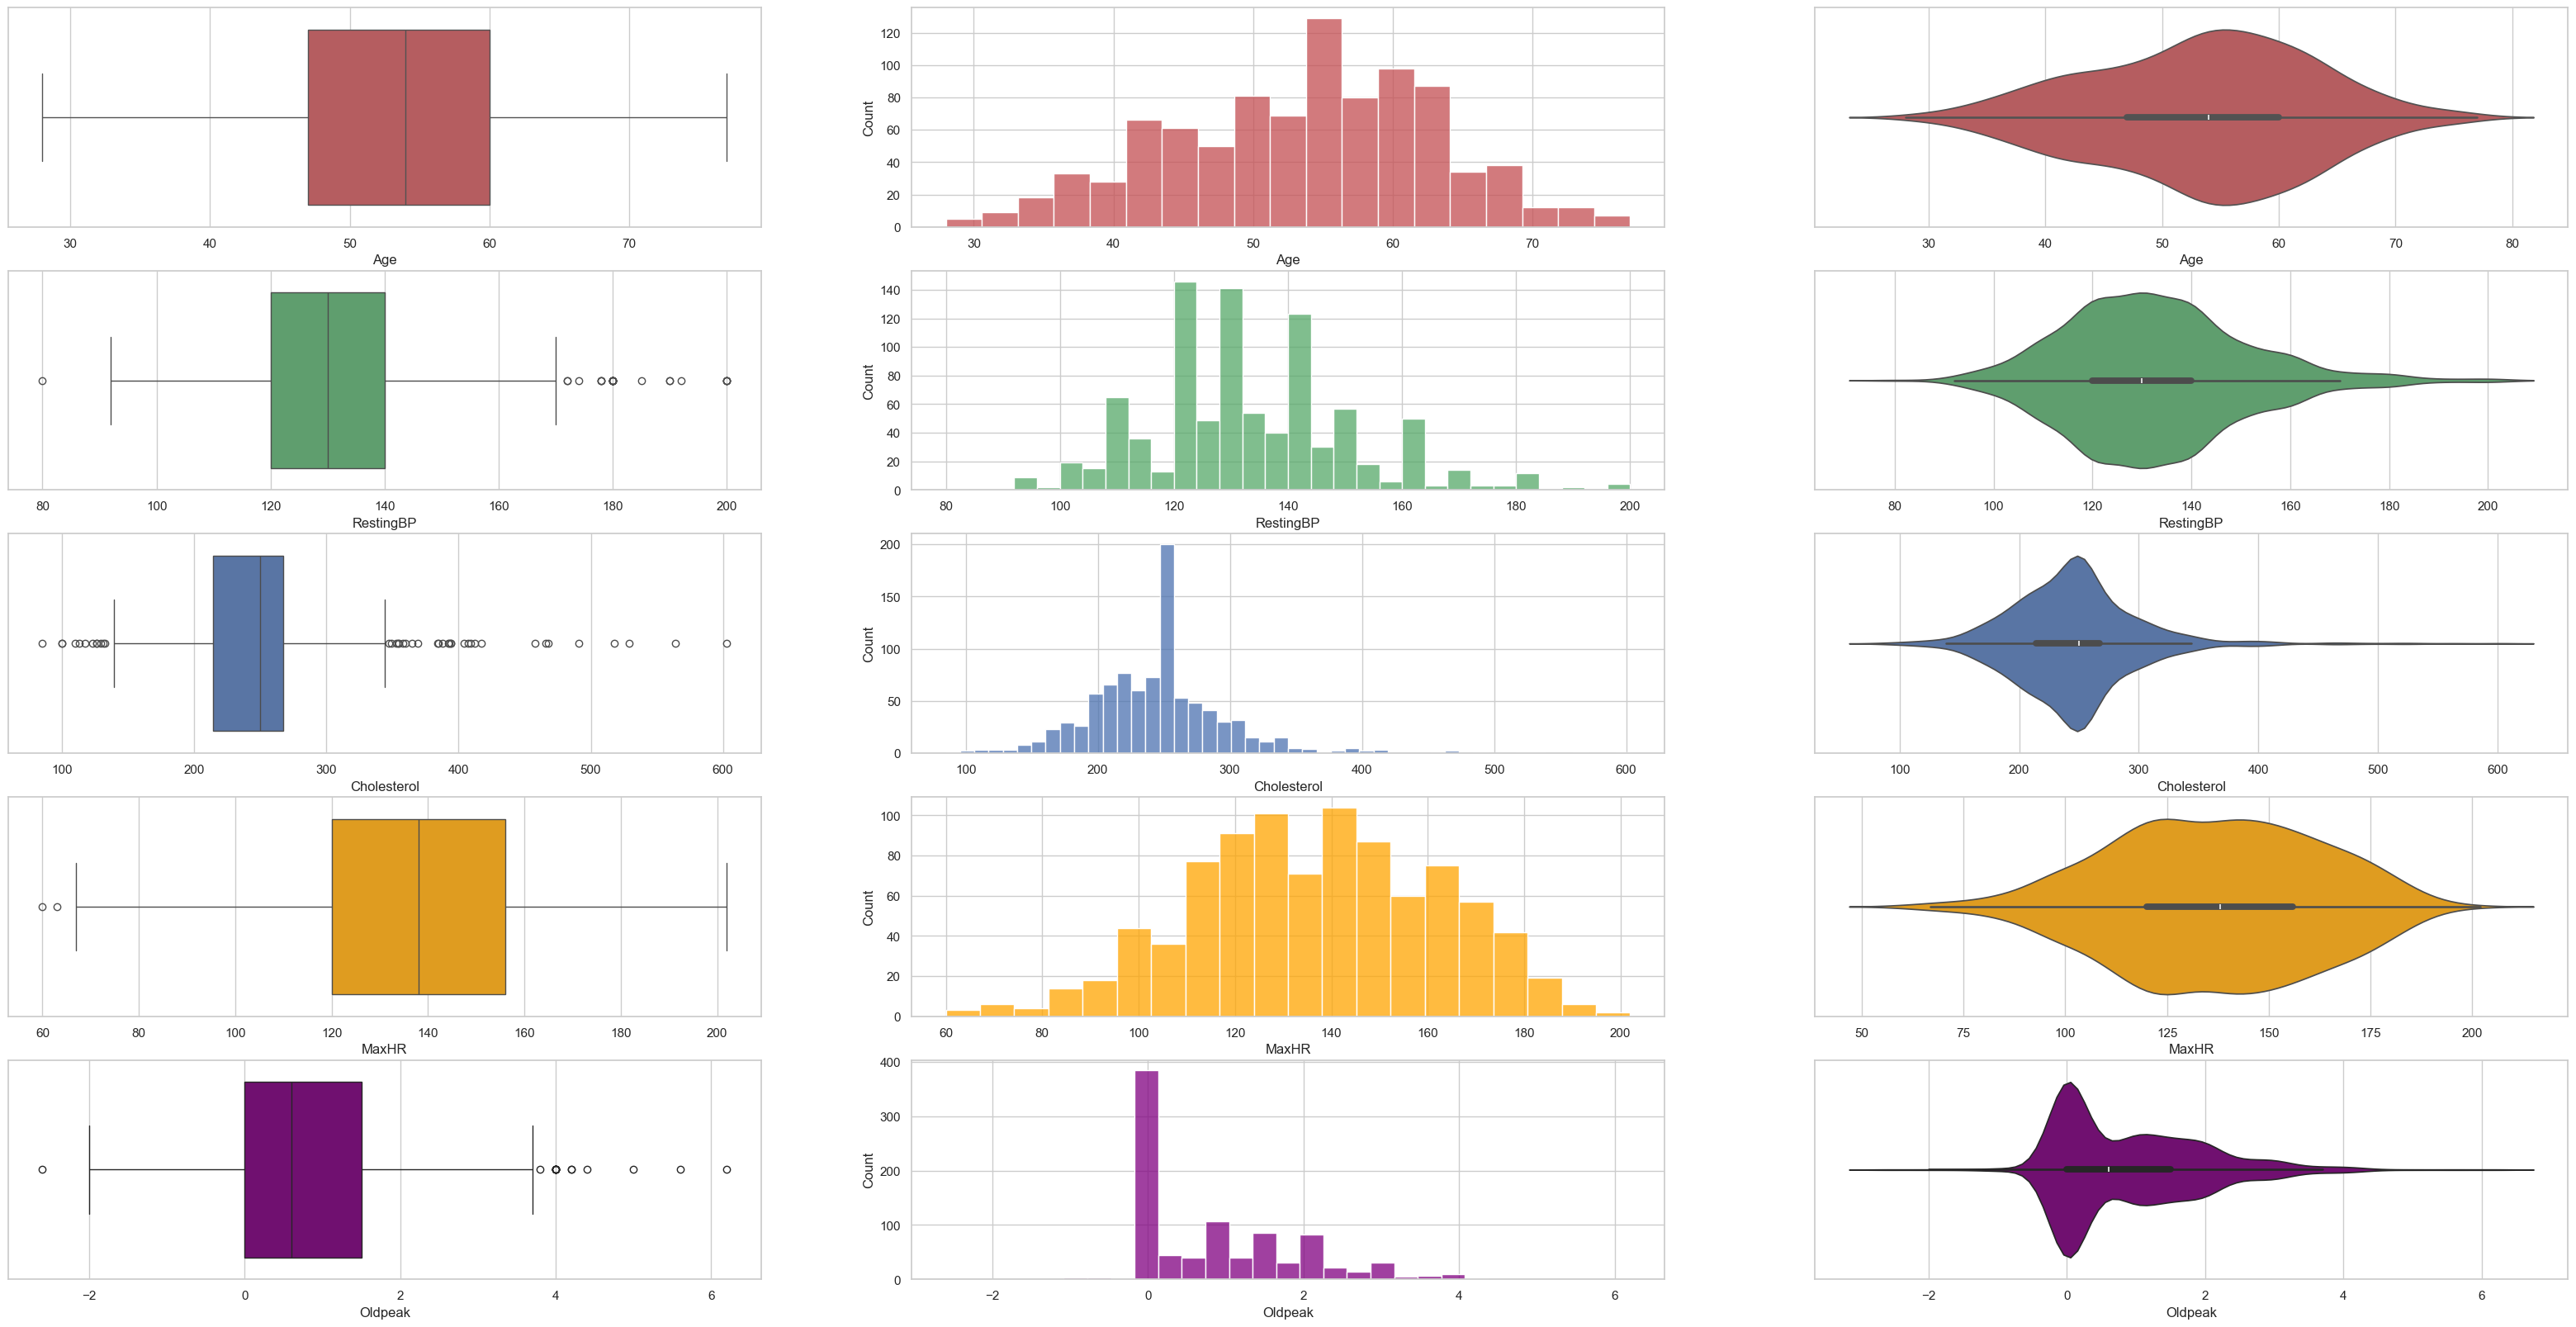

In [ ]:
# Select only numerical columns
heartFailuredata_num = pd.DataFrame(heartFailuredata[['Age', 'RestingBP','Cholesterol','MaxHR', 'Oldpeak']])

# Set colors for each feature
colors = ["r", "g", "b", "orange", "purple"]

# Create subplots (5 rows, 3 columns)
fig, axes = plt.subplots(5, 3, figsize=(40, 20))

# Loop through the numerical variables
count = 0
for var in heartFailuredata_num:
    sns.boxplot(data=heartFailuredata_num[var], orient="h", color=colors[count], ax=axes[count,0])
    sns.histplot(data=heartFailuredata_num[var], color=colors[count], ax=axes[count,1])
    sns.violinplot(data=heartFailuredata_num[var], orient="h", color=colors[count], ax=axes[count, 2])
    count += 1

plt.show()


**Correlation matrix for numerical features**

                  Age  RestingBP  Cholesterol     MaxHR   Oldpeak
Age          1.000000   0.263084     0.057459 -0.382280  0.258563
RestingBP    0.263084   1.000000     0.080924 -0.109693  0.174252
Cholesterol  0.057459   0.080924     1.000000 -0.029197  0.052557
MaxHR       -0.382280  -0.109693    -0.029197  1.000000 -0.161213
Oldpeak      0.258563   0.174252     0.052557 -0.161213  1.000000 



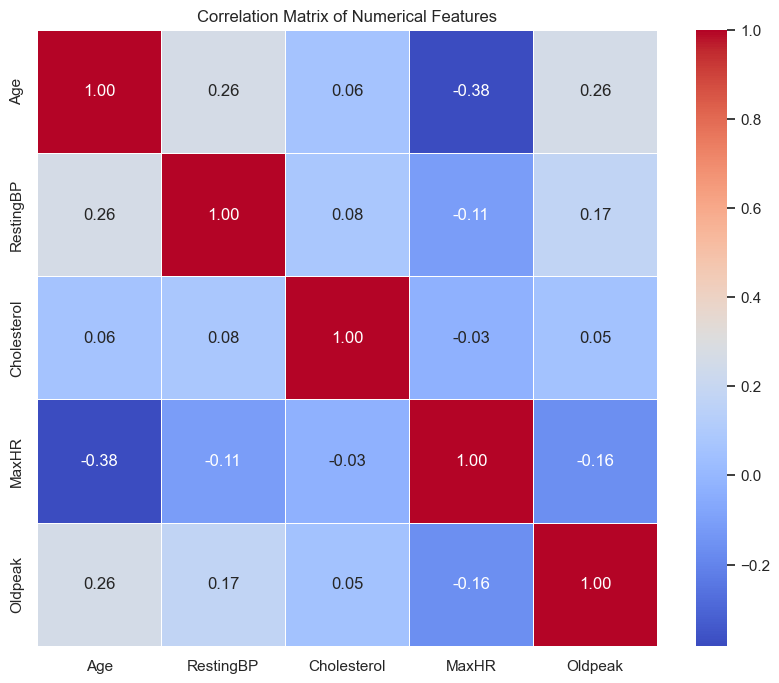

In [ ]:
print(heartFailuredata_num.corr(),'\n')

# Compute the correlation matrix
correlation_matrix = heartFailuredata_num.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add title
plt.title("Correlation Matrix of Numerical Features")

# Show plot
plt.show()


**Categorical Variables**


In [54]:
heartFailuredata_cat = pd.DataFrame(heartFailuredata[['Sex', 'ChestPainType','FastingBS','RestingECG', 'ExerciseAngina','ST_Slope', 'Oldpeak', 'HeartDisease']])
heartFailuredata_cat.describe()

,Oldpeak
count,917.000000
mean,0.886696
std,1.066960
min,-2.600000
25%,0.000000
50%,0.600000
75%,1.500000
max,6.200000


**Checking of class distribution**

In [ ]:
# Check imbalance for each categorical variable
for var in heartFailuredata_cat:
    print(f"\nDistribution for {var} in percentage(%) :")
    print(heartFailuredata[var].value_counts(normalize=True) * 100)


Distribution for Sex in percentage(%) :
Sex
M    78.953108
F    21.046892
Name: proportion, dtype: float64

Distribution for ChestPainType in percentage(%) :
ChestPainType
ASY    54.089422
NAP    22.028353
ATA    18.865867
TA      5.016358
Name: proportion, dtype: float64

Distribution for FastingBS in percentage(%) :
FastingBS
Normal    76.663032
High      23.336968
Name: proportion, dtype: float64

Distribution for RestingECG in percentage(%) :
RestingECG
Normal    60.087241
LVH       20.501636
ST        19.411123
Name: proportion, dtype: float64

Distribution for ExerciseAngina in percentage(%) :
ExerciseAngina
N    59.541985
Y    40.458015
Name: proportion, dtype: float64

Distribution for ST_Slope in percentage(%) :
ST_Slope
Mild risk    50.054526
Normal       43.075245
High risk     6.870229
Name: proportion, dtype: float64

Distribution for Oldpeak in percentage(%) :
Oldpeak
 0.0    40.130862
 1.0     9.378408
 2.0     8.287895
 1.5     5.670665
 3.0     3.053435
 1.2     2.835

**Statistical distribution for Sex**

['M', 'F']
Categories (2, object): ['F', 'M']

Summary Statistics for Sex:
count     917
unique      2
top         M
freq      724
Name: Sex, dtype: object


C:\Users\Han Wen\AppData\Local\Temp\ipykernel_109036\3174810909.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Sex', data=heartFailuredata, kind='count', palette="magma")


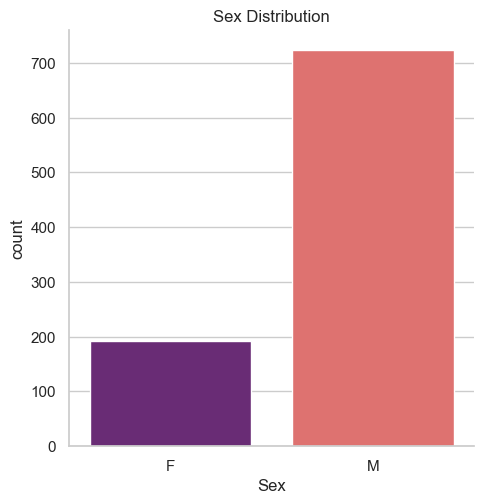

In [ ]:
# Check the unique values in the 'Sex' column
print(heartFailuredata["Sex"].unique())

# Summary Statistics
print("\nSummary Statistics for Sex:")
print(heartFailuredata['Sex'].describe())

# Plot count plot with Seaborn's color palette
sns.catplot(x='Sex', data=heartFailuredata, kind='count', palette="magma")

# Add title
plt.title("Sex Distribution")

# Show the plot
plt.show()


**Statistical distribution for ChestPainType**

['ATA', 'NAP', 'ASY', 'TA']
Categories (4, object): ['ASY', 'ATA', 'NAP', 'TA']

Summary Statistics for ChestPainType	:
count     917
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object


C:\Users\Han Wen\AppData\Local\Temp\ipykernel_109036\2193506755.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'ChestPainType', data = heartFailuredata, kind = "count", palette="magma")


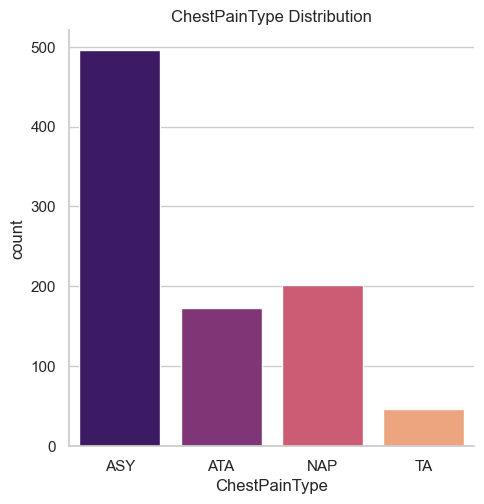

In [ ]:
# Check the unique values in the 'ChestPainType' column
print(heartFailuredata["ChestPainType"].unique())

#Summary Statistics
print("\nSummary Statistics for ChestPainType	:")
print(heartFailuredata['ChestPainType'].describe())

sns.catplot(x = 'ChestPainType', data = heartFailuredata, kind = "count", palette="magma")
plt.title("ChestPainType Distribution")
plt.show()

**Statistical distribution for FastingBS**

Unique values in FastingBS: ['Normal', 'High']
Categories (2, object): ['Normal', 'High']


C:\Users\Han Wen\AppData\Local\Temp\ipykernel_109036\2928865182.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=heartFailuredata['FastingBS'], palette="magma")


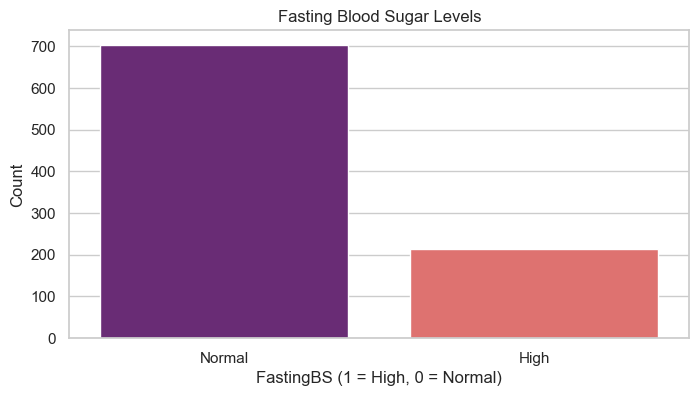

In [ ]:
#EDA and data cleaning for Fasting BS

#unique values
print("Unique values in FastingBS:", heartFailuredata['FastingBS'].unique())

#data distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=heartFailuredata['FastingBS'], palette="magma")
plt.title("Fasting Blood Sugar Levels")
plt.xlabel("FastingBS (1 = High, 0 = Normal)")
plt.ylabel("Count")
plt.show()

### Statistical distribution for Resting ECG

Unique values in RestingECG: ['Normal', 'ST', 'LVH']
Categories (3, object): ['LVH', 'Normal', 'ST']

Summary Statistics for RestingECG:
count        917
unique         3
top       Normal
freq         551
Name: RestingECG, dtype: object


C:\Users\Han Wen\AppData\Local\Temp\ipykernel_109036\4130460469.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=heartFailuredata["RestingECG"], palette="magma")


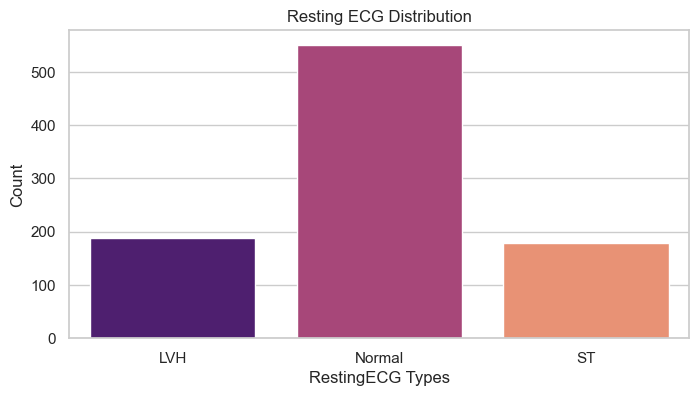

In [ ]:
#EDA for resting ECG

#Check unique values in RestingECG
print("Unique values in RestingECG:", heartFailuredata['RestingECG'].unique())

#Summary Statistics
print("\nSummary Statistics for RestingECG:")
print(heartFailuredata['RestingECG'].describe())

#Data Distribution (Visualization)
plt.figure(figsize=(8, 4))
sns.countplot(x=heartFailuredata["RestingECG"], palette="magma")
plt.title("Resting ECG Distribution")
plt.xlabel("RestingECG Types")
plt.ylabel("Count")
plt.show()

**Statistical distribution of Oldpeak**


ST_Slope Value Counts:
 ST_Slope
Mild risk    459
Normal       395
High risk     63
Name: count, dtype: int64


C:\Users\Han Wen\AppData\Local\Temp\ipykernel_109036\1658893605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heartFailuredata, x='ST_Slope', palette='viridis')


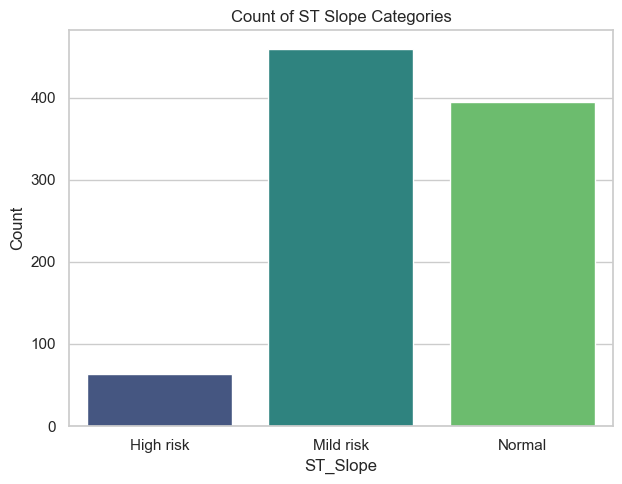

In [ ]:
oldpeak_desc = heartFailuredata['Oldpeak'].describe()
st_slope_desc = heartFailuredata['ST_Slope'].value_counts()

print("\nST_Slope Value Counts:\n", st_slope_desc)

# Set the visual style
sns.set(style="whitegrid")

# Plot distribution of 'Oldpeak'
plt.figure(figsize=(12, 5))

# Count plot for ST_Slope
plt.subplot(1, 2, 2)
sns.countplot(data=heartFailuredata, x='ST_Slope', palette='viridis')
plt.title('Count of ST Slope Categories')
plt.xlabel('ST_Slope')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


Oldpeak by ST_Slope:
            count      mean       std  min   25%  50%  75%  max
ST_Slope                                                      
High risk   63.0  2.152381  1.401135 -1.5  1.35  2.0  3.0  6.2
Mild risk  459.0  1.188017  1.018287 -2.6  0.10  1.1  2.0  5.0
Normal     395.0  0.334684  0.681881 -1.1  0.00  0.0  0.3  4.0


C:\Users\Han Wen\AppData\Local\Temp\ipykernel_109036\1526754375.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  oldpeak_by_slope = heartFailuredata.groupby('ST_Slope')['Oldpeak'].describe()
C:\Users\Han Wen\AppData\Local\Temp\ipykernel_109036\1526754375.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=heartFailuredata, x='ST_Slope', y='Oldpeak', palette='pastel')


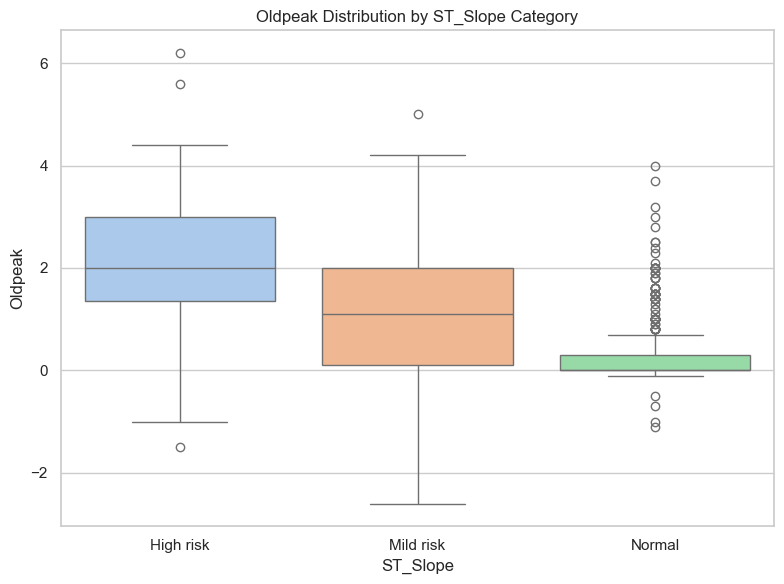

In [ ]:
oldpeak_by_slope = heartFailuredata.groupby('ST_Slope')['Oldpeak'].describe()
print("Oldpeak by ST_Slope:\n", oldpeak_by_slope)

# Boxplot: Oldpeak vs ST_Slope
plt.figure(figsize=(8, 6))
sns.boxplot(data=heartFailuredata, x='ST_Slope', y='Oldpeak', palette='pastel')
plt.title('Oldpeak Distribution by ST_Slope Category')
plt.xlabel('ST_Slope')
plt.ylabel('Oldpeak')
plt.tight_layout()
plt.show()

**Statistical distribution for ExerciseAngina**

Unique values in ExerciseAngina: ['N', 'Y']
Categories (2, object): ['N', 'Y']

Summary Statistics for ExerciseAngina:
count     917
unique      2
top         N
freq      546
Name: ExerciseAngina, dtype: object


C:\Users\Han Wen\AppData\Local\Temp\ipykernel_109036\2586813861.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ExerciseAngina',


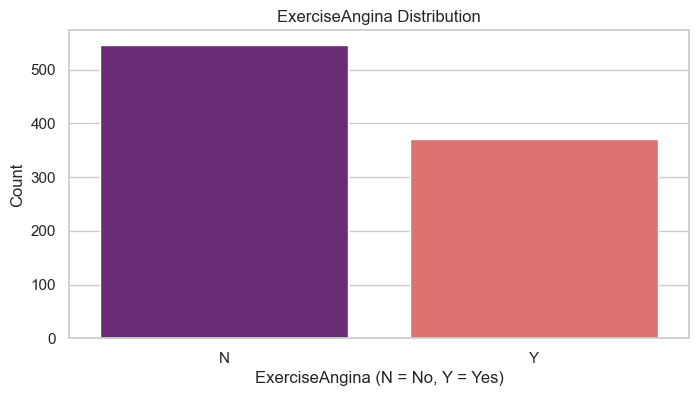

In [ ]:
#Check unique values in ExerciseAngina
print("Unique values in ExerciseAngina:", heartFailuredata['ExerciseAngina'].unique())

#Summary Statistics
print("\nSummary Statistics for ExerciseAngina:")
print(heartFailuredata['ExerciseAngina'].describe())

# Bar plot for ExerciseAngina
plt.figure(figsize=(8, 4))
sns.countplot(x='ExerciseAngina',
    data=heartFailuredata,
    palette='magma',
    order=['N', 'Y'])
plt.title('ExerciseAngina Distribution')
plt.xlabel('ExerciseAngina (N = No, Y = Yes)')
plt.ylabel('Count')
plt.show()

**Categorical distribution visualization with Heart Disease**


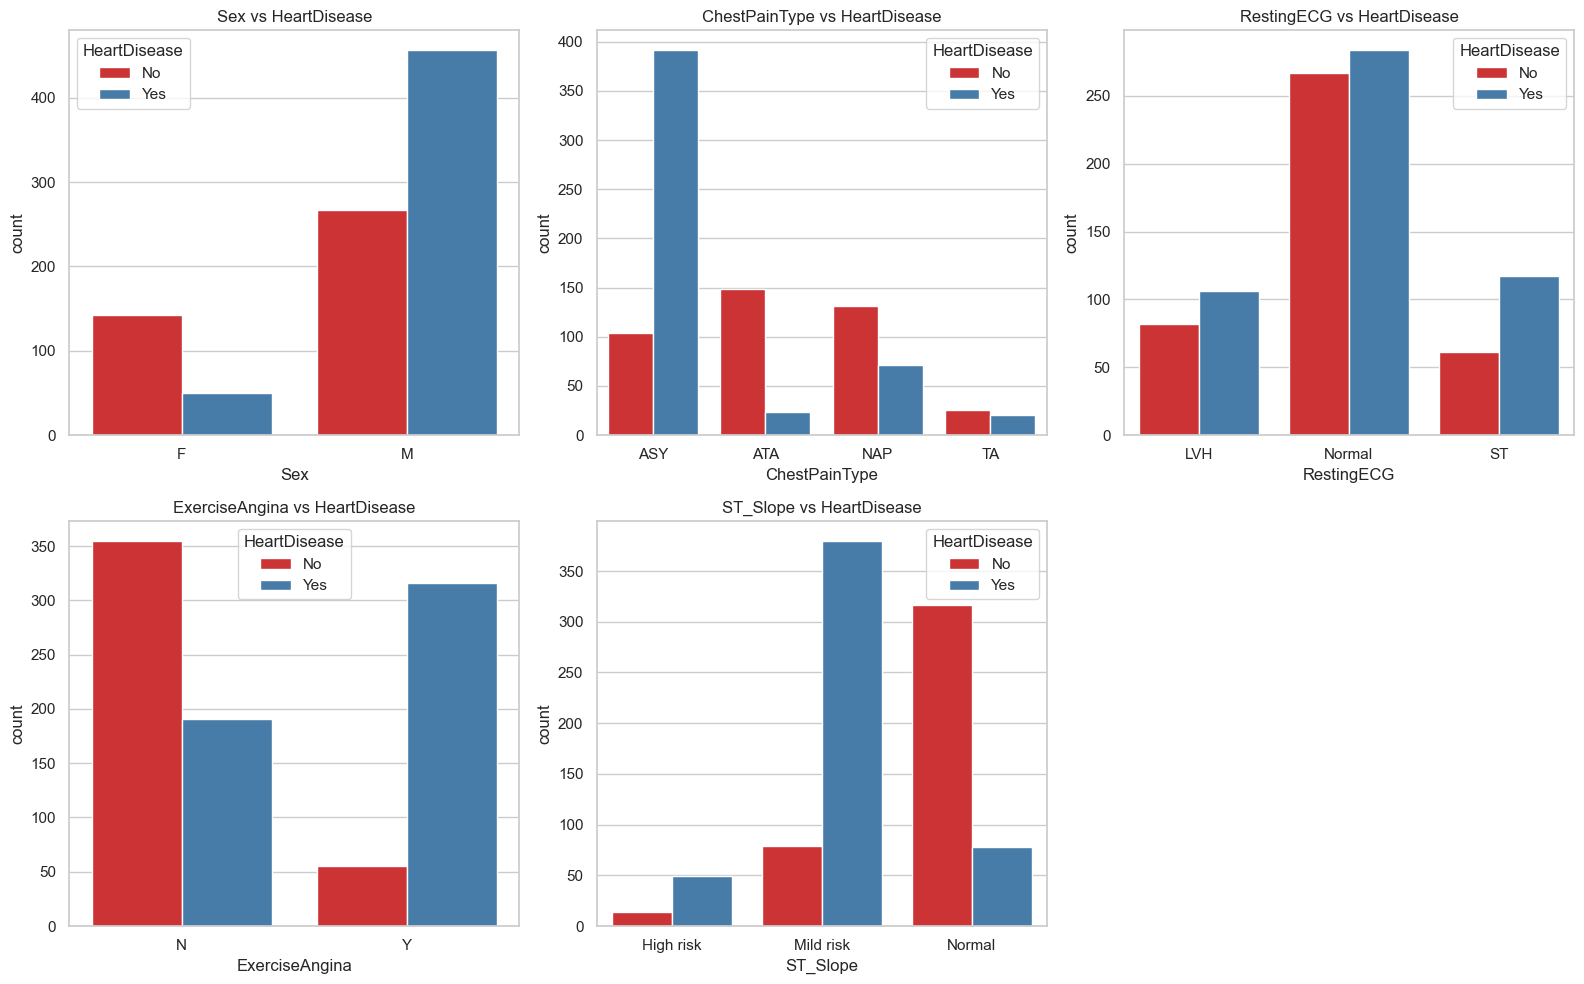

In [ ]:
sns.set(style="whitegrid")
# Categorical features
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='HeartDisease', data=heartFailuredata, palette='Set1')
    plt.title(f'{feature} vs HeartDisease')
plt.tight_layout()
plt.show()


**Numerical and Categorical representation**

**Calculating strength of the categorical variables with Chi-square test and Cramer's V**<br>

Chi-Square: determine if there is a statistically signicant relationship between two categorical variables. p-value of <0.05, means the variables tested are related<br>

Cramer's V: determine the strongly one categorical variable is associated with another<br>




Chi-square Test Results:

              Var1            Var2  Chi2 Stat  p-value  Cramer's V
0     HeartDisease        ST_Slope    355.156  0.00000       0.621
1    ChestPainType    HeartDisease    268.896  0.00000       0.539
2   ExerciseAngina    HeartDisease    223.107  0.00000       0.492
3   ExerciseAngina        ST_Slope    192.137  0.00000       0.456
4    ChestPainType  ExerciseAngina    178.795  0.00000       0.438
5              Sex    HeartDisease     83.871  0.00000       0.301
6    ChestPainType        ST_Slope    157.142  0.00000       0.287
7        FastingBS    HeartDisease     64.591  0.00000       0.263
8              Sex   ChestPainType     36.996  0.00000       0.193
9              Sex  ExerciseAngina     32.583  0.00000       0.186
10       FastingBS        ST_Slope     28.477  0.00000       0.170
11   ChestPainType       FastingBS     23.610  0.00003       0.150
12             Sex        ST_Slope     21.692  0.00002       0.147
13       FastingBS      RestingECG 

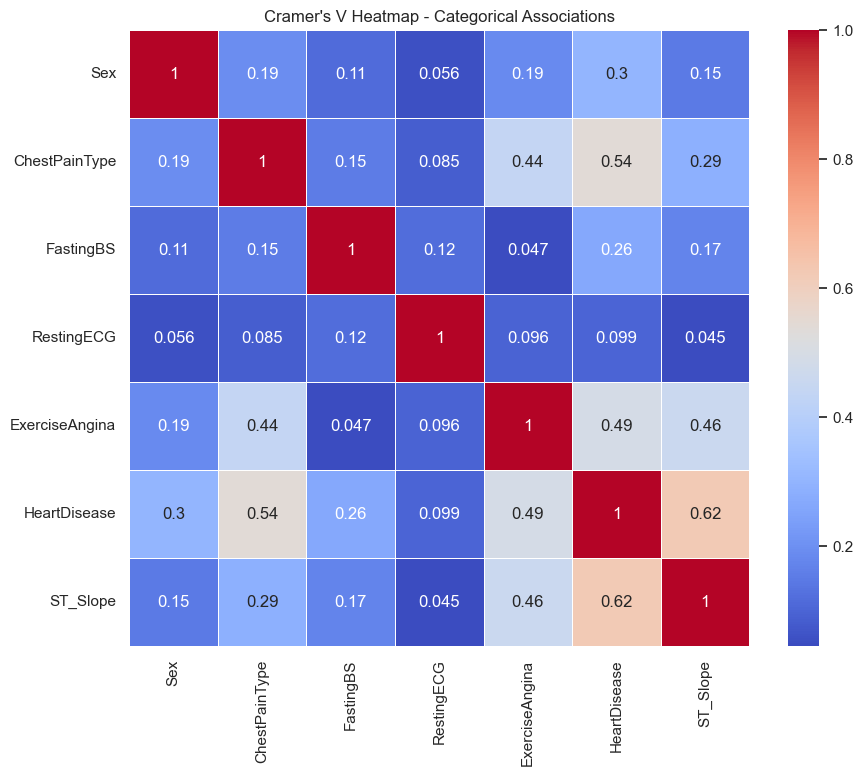

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns
heartFailuredata_cat = pd.DataFrame(heartFailuredata[['Sex', 'ChestPainType', 'FastingBS',
                                                      'RestingECG', 'ExerciseAngina', 'HeartDisease', 'ST_Slope']])

# Containers for results
chi2_results = []
cramers_v_matrix = pd.DataFrame(index=heartFailuredata_cat.columns, columns=heartFailuredata_cat.columns)

# Loop through all pairs
for col1 in heartFailuredata_cat.columns:
    for col2 in heartFailuredata_cat.columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            # Build contingency table
            table = pd.crosstab(heartFailuredata_cat[col1], heartFailuredata_cat[col2])
            chi2, p, dof, _ = chi2_contingency(table)

            # Calculate Cramér's V
            n = table.sum().sum()
            phi2 = chi2 / n
            r, k = table.shape
            phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
            rcorr = r - ((r - 1)**2) / (n - 1)
            kcorr = k - ((k - 1)**2) / (n - 1)
            cramer_v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

            cramers_v_matrix.loc[col1, col2] = cramer_v

            # Save Chi-square result
            chi2_results.append({
                'Var1': col1,
                'Var2': col2,
                'Chi2 Stat': round(chi2, 3),
                'p-value': round(p, 5),
                'Cramer\'s V': round(cramer_v, 3)
            })

# Convert to DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Remove self-pairs and duplicates (A vs B and B vs A)
chi2_df = chi2_df[chi2_df['Var1'] != chi2_df['Var2']]
chi2_df = chi2_df.drop_duplicates(subset=['Chi2 Stat', 'p-value'])

# Print the table of Chi-square and Cramér's V
print("\nChi-square Test Results:\n")
print(chi2_df.sort_values(by='Cramer\'s V', ascending=False).reset_index(drop=True),'\n')

# Show heatmap of Cramér's V
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Cramer's V Heatmap - Categorical Associations")
plt.show()


**Calculating strength of numerical variables with Heart disease using point biserial correlation**<br>

Point Biserial Correlation: Determine association between a binary varible (Heart Disease) with a continous one (numberical variables)

Correlation Table:
       Feature  Correlation       P-Value
0          Age     0.282012  3.160837e-18
1    RestingBP     0.117990  3.427866e-04
2  Cholesterol     0.114495  5.130926e-04
3        MaxHR    -0.401410  8.044073e-37
4      Oldpeak     0.403638  3.004274e-37

T-test Results:
       Feature  T-Statistic       P-Value
0          Age    -8.891459  3.160837e-18
1    RestingBP    -3.594182  3.427866e-04
2  Cholesterol    -3.486269  5.130926e-04
3        MaxHR    13.257172  8.044073e-37
4      Oldpeak   -13.345046  3.004274e-37


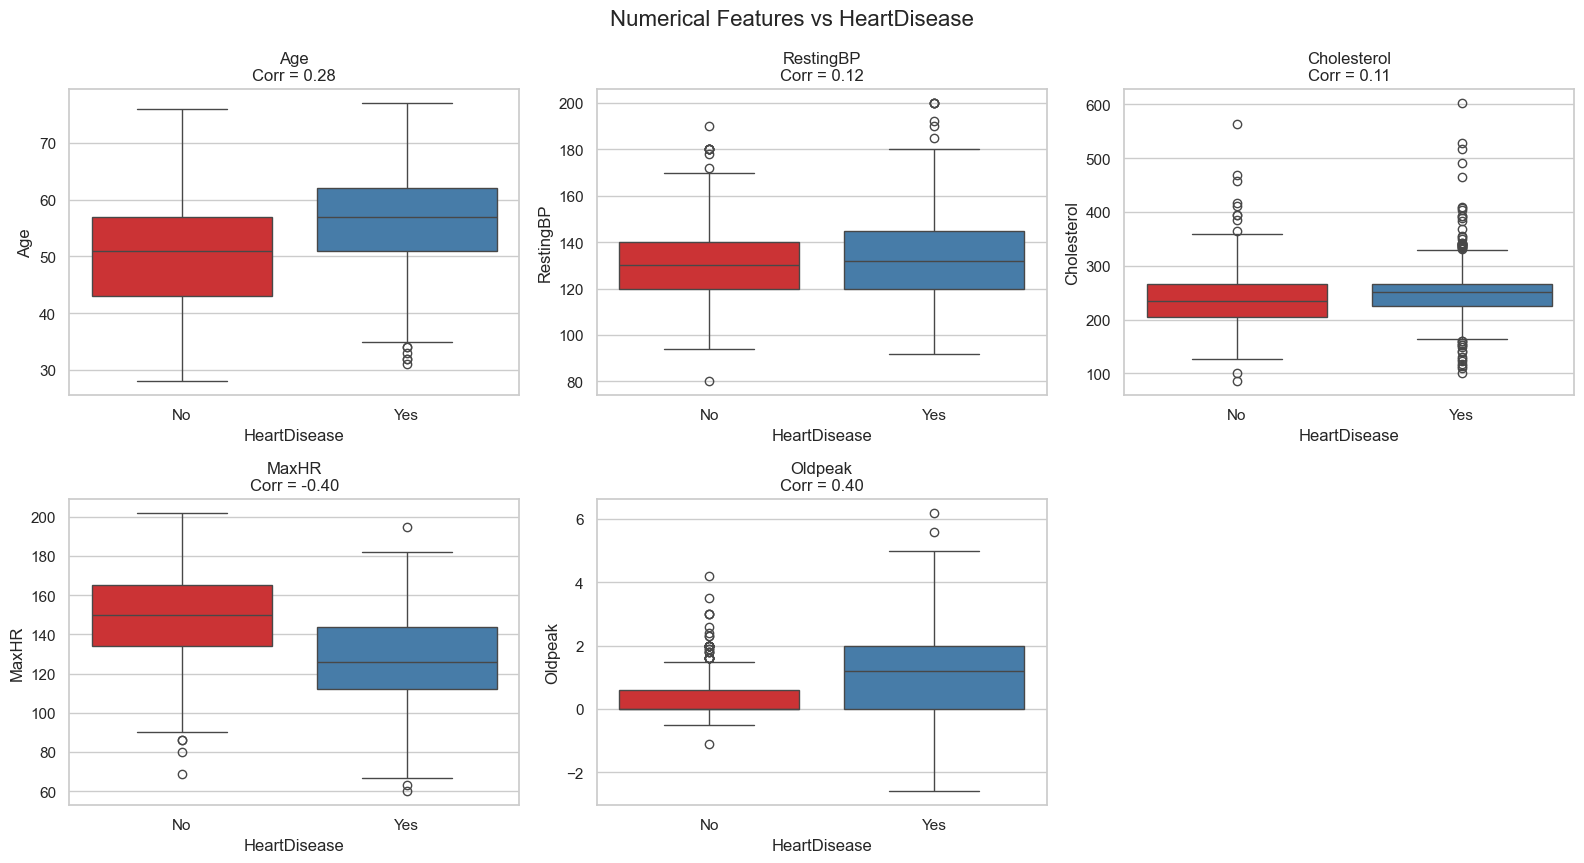

In [ ]:
from scipy.stats import pointbiserialr, ttest_ind
import numpy as np

# Safely remove HeartDisease from numeric columns
numerical_cols = [col for col in heartFailuredata.select_dtypes(include=['float64', 'int64']).columns if col != 'HeartDisease']

# Ensure HeartDisease is categorical
heartFailuredata['HeartDisease'] = heartFailuredata['HeartDisease'].astype('category')

# Store results
correlation_results = []
ttest_results = []

# Calculate correlations and t-tests
for col in numerical_cols:
    # TEMPORARY map to numeric for stats ONLY
    hd_numeric = heartFailuredata['HeartDisease'].map({'No': 0, 'Yes': 1})

    # Drop rows with missing values in the current feature
    valid_idx = ~heartFailuredata[col].isna()
    temp_data = heartFailuredata.loc[valid_idx]
    temp_hd_numeric = hd_numeric[valid_idx]

    # Skip features with too few samples in any class
    class_counts = temp_hd_numeric.value_counts()
    if class_counts.min() < 2:
        correlation_results.append((col, np.nan, np.nan))
        ttest_results.append((col, np.nan, np.nan))
        continue

    # Calculate correlation and t-test
    corr, p_corr = pointbiserialr(temp_data[col], temp_hd_numeric)
    t_stat, p_ttest = ttest_ind(
        temp_data[temp_hd_numeric == 0][col],
        temp_data[temp_hd_numeric == 1][col]
    )

    correlation_results.append((col, corr, p_corr))
    ttest_results.append((col, t_stat, p_ttest))

# Convert to DataFrames
corr_df = pd.DataFrame(correlation_results, columns=["Feature", "Correlation", "P-Value"])
ttest_df = pd.DataFrame(ttest_results, columns=["Feature", "T-Statistic", "P-Value"])

# Print tables
print("Correlation Table:")
print(corr_df)

print("\nT-test Results:")
print(ttest_df)

# Create boxplots in original order
plt.figure(figsize=(16, 12))
for i, col in enumerate(corr_df["Feature"], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='HeartDisease', y=col, data=heartFailuredata, hue='HeartDisease', palette='Set1', dodge=False)
    corr_val = corr_df[corr_df["Feature"] == col]["Correlation"].values[0]
    p_val = corr_df[corr_df["Feature"] == col]["P-Value"].values[0]
    plt.title(f"{col}\nCorr = {corr_val:.2f}")
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.tight_layout()

plt.suptitle("Numerical Features vs HeartDisease", y=1.02, fontsize=16)
plt.show()


# Data Preparation for Machine Learning


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Step 1: Drop unwanted column
heartFailuredata.drop(columns=['HeartStressIndex'], inplace=True, errors='ignore')


# Step 2: Define features and target
X = heartFailuredata.drop(columns=["HeartDisease"])
y = heartFailuredata["HeartDisease"]

# Step 3: Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Normalize numeric features (for logistic regression only)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

for col in X_train_scaled.select_dtypes(include='category').columns:
    X_train_scaled[col] = X_train_scaled[col].cat.codes
    X_test_scaled[col] = X_test_scaled[col].cat.codes

# Step 5: Summary
print("Data Preparation completed.")
print("Use the following datasets:")
print("→ For Random Forest / Decision Tree: X_train, X_test")
print("→ For Logistic Regression: X_train_scaled, X_test_scaled")
print(X_train.dtypes)
print(X_train.head())



Data Preparation completed.
Use the following datasets:
→ For Random Forest / Decision Tree: X_train, X_test
→ For Logistic Regression: X_train_scaled, X_test_scaled
Age                  int64
Sex               category
ChestPainType     category
RestingBP            int64
Cholesterol        float64
FastingBS         category
RestingECG        category
MaxHR                int64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
dtype: object
     Age Sex ChestPainType  RestingBP  Cholesterol FastingBS RestingECG  \
161   49   M           ASY        128        212.0    Normal     Normal   
604   68   M           NAP        134        254.0      High     Normal   
659   59   M           NAP        126        218.0      High     Normal   
793   67   M           ASY        125        254.0      High     Normal   
140   52   M           ASY        160        331.0    Normal     Normal   

     MaxHR ExerciseAngina  Oldpeak   ST_Slope  
161     96              

# Machine Learning


## Decision trees Model


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve
)
from sklearn.metrics import auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# Ensure all categorical columns are numeric
for col in X_train.select_dtypes(include='category').columns:
    X_train[col] = X_train[col].cat.codes
    X_test[col] = X_test[col].cat.codes

y_train = y_train.astype('category').cat.codes
y_test = y_test.astype('category').cat.codes

# Train decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, y_proba_dt)
prec_vals, rec_vals, _ = precision_recall_curve(y_test, y_proba_dt)
pr_auc = auc(rec_vals, prec_vals)

print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print(f"PR AUC:     {pr_auc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# PR curve
plt.figure(figsize=(6, 5))
plt.plot(rec_vals, prec_vals, label=f"PR AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'graphviz'

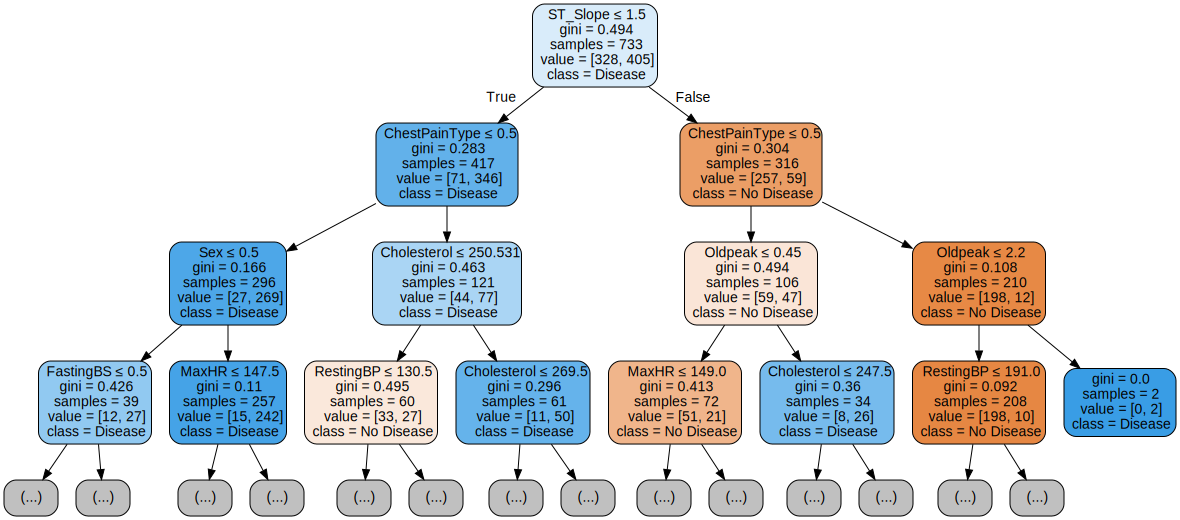

In [ ]:
#Visualize decision tree (limit depth for clarity)
dot_data = export_graphviz(
    dt_model,
    out_file=None,
    feature_names=X_train.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3  # adjust depth for readability
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)
graph  # If running in notebook environment, this will display the tree


Decision Tree is a non-linear model that recursively splits the data based on feature thresholds to form interpretable decision paths.
It handles both categorical and numerical data without the need for standardization.
However, due to its high variance and tendency to overfit, especially when used without pruning, the model performance was lower than ensemble methods.
Nonetheless, it provides valuable insight into how individual features contribute to classification through simple rules.

## Random Forest Model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Grid Search: Tune Hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)

# Best Model from GridSearch
best_rf_model = grid_search_rf.best_estimator_

# Predict on Test Set
y_pred_rf = best_rf_model.predict(X_test)
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf)
prec_vals, rec_vals, _ = precision_recall_curve(y_test, y_proba_rf)
pr_auc = auc(rec_vals, prec_vals)

print("=== Classification Report - Random Forest (Tuned) ===")
print(classification_report(y_test, y_pred_rf))
print("Best Parameters from Grid Search:", grid_search_rf.best_params_)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")
print(f"PR AUC:     {pr_auc:.4f}")

=== Classification Report - Random Forest (Tuned) ===
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

Best Parameters from Grid Search: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy:  0.8913
Precision: 0.8942
Recall:    0.9118
F1 Score:  0.9029
ROC AUC:   0.9415
PR AUC:     0.9432


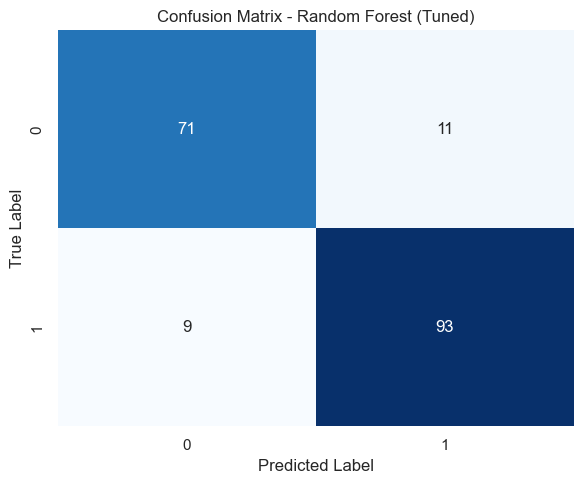

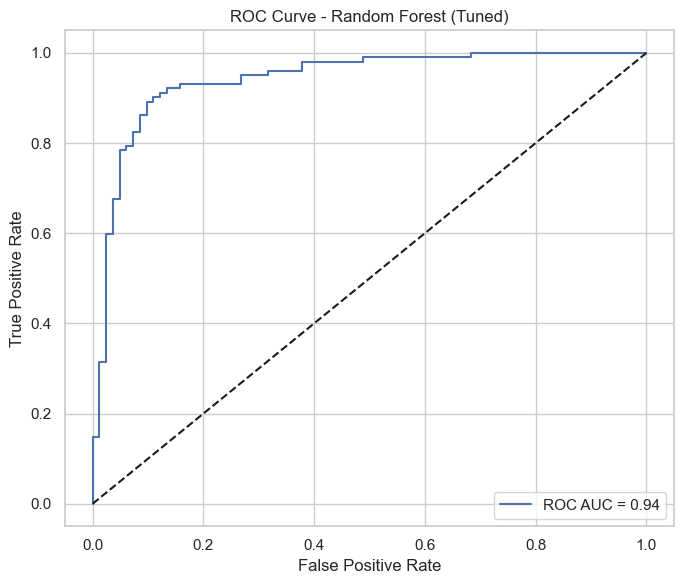

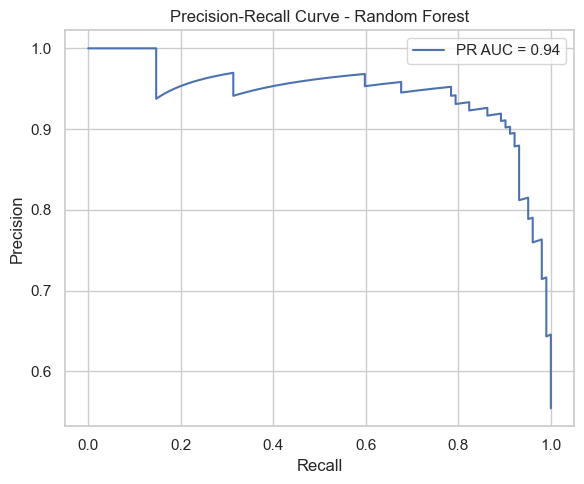

C:\Users\Han Wen\AppData\Local\Temp\ipykernel_26456\2895780197.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


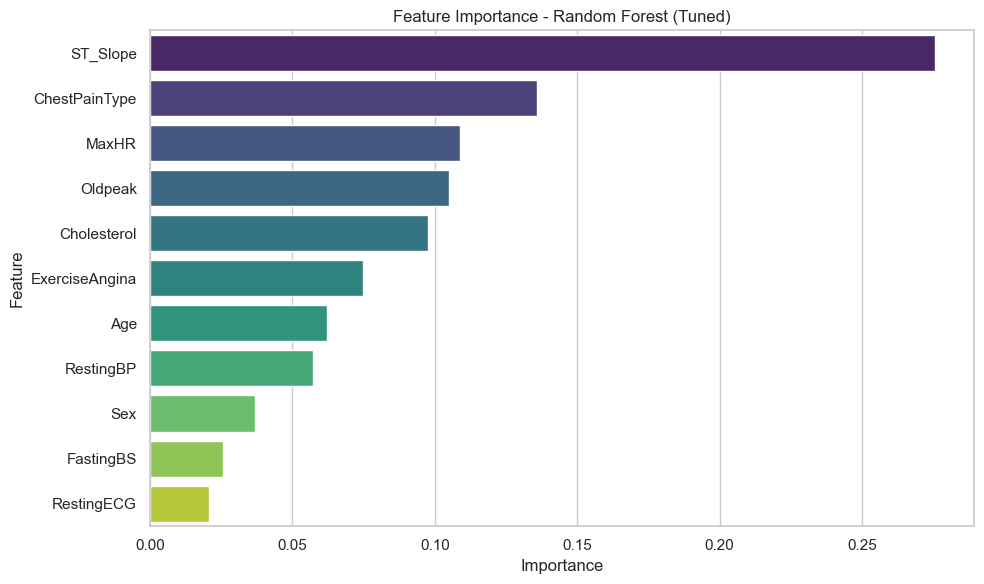

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Random Forest (Tuned)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Tuned)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

#PR curve
plt.figure(figsize=(6, 5))
plt.plot(rec_vals, prec_vals, label=f"PR AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance
importances = best_rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance - Random Forest (Tuned)")
plt.tight_layout()
plt.show()


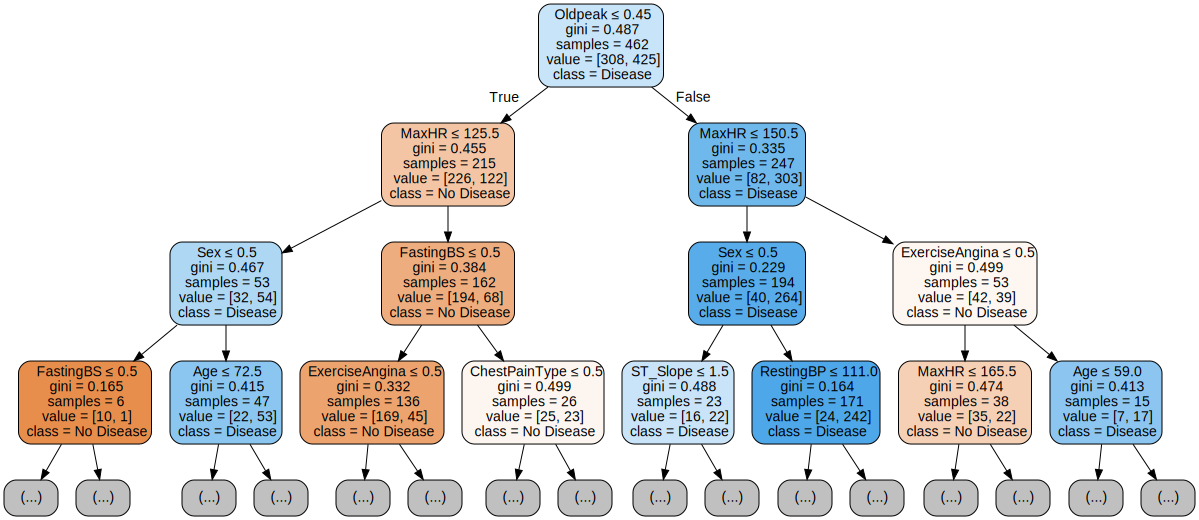

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Access a specific tree from the Random Forest
tree_to_visualize = best_rf_model.estimators_[0]  # Select the first tree (you can change the index)

# Visualize decision tree (limit depth for clarity)
dot_data = export_graphviz(
    tree_to_visualize,
    out_file=None,
    feature_names=X_train.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3  # adjust depth for readability
)

# Generate and render the graph
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree", format="png", cleanup=True)
graph

Random Forest is an ensemble learning method that builds multiple decision trees and aggregates their predictions to improve generalization.
We applied GridSearchCV to tune hyperparameters such as the number of trees, tree depth, and split criteria.
This model significantly improved performance metrics, especially recall and ROC AUC, showing strong robustness and predictive power.
It also offers reliable feature importance estimates, making it a solid choice for both performance and interpretability in medical prediction tasks.

## Logistics Regression Model

**Logistics regression using cross validation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import loguniform

y_train = y_train.astype('category').cat.codes
y_test = y_test.astype('category').cat.codes

# Model with class_weight='balanced'
logreg = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)

# Cross-validation (on training set)
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("=== Cross-Validated ROC AUC Scores ===")
print(cv_scores)
print("Mean AUC:", np.mean(cv_scores))

# Predictions on test set
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
prec_vals, rec_vals, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(rec_vals, prec_vals)

print("\n=== Classification Report - Logistic Regression ===")
print(classification_report(y_test, y_pred))
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

=== Cross-Validated ROC AUC Scores ===
[0.93284699 0.95884774 0.92442948 0.87711301 0.84159544]
Mean AUC: 0.9069665314109759

=== Classification Report - Logistic Regression ===
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        82
           1       0.86      0.88      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Accuracy:  0.8533
Precision: 0.8571
Recall:    0.8824
F1 Score:  0.8696
ROC AUC:   0.9078


C:\Users\Han Wen\AppData\Local\Temp\ipykernel_26456\2730791168.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


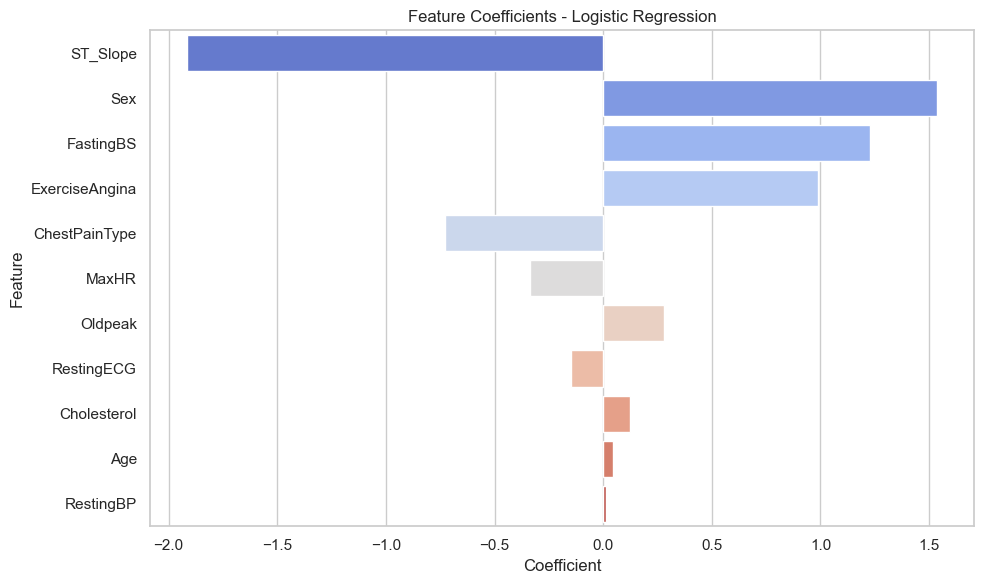

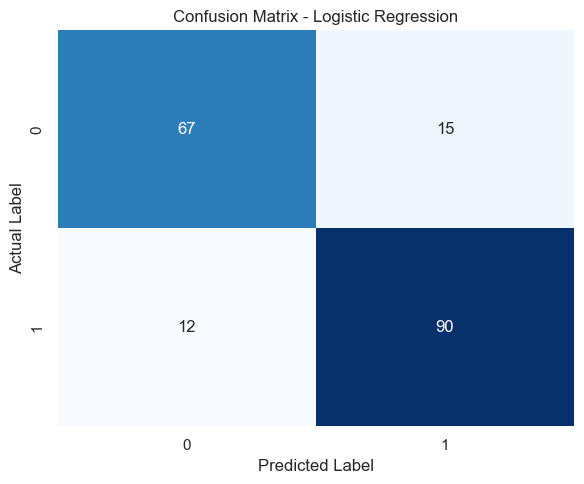

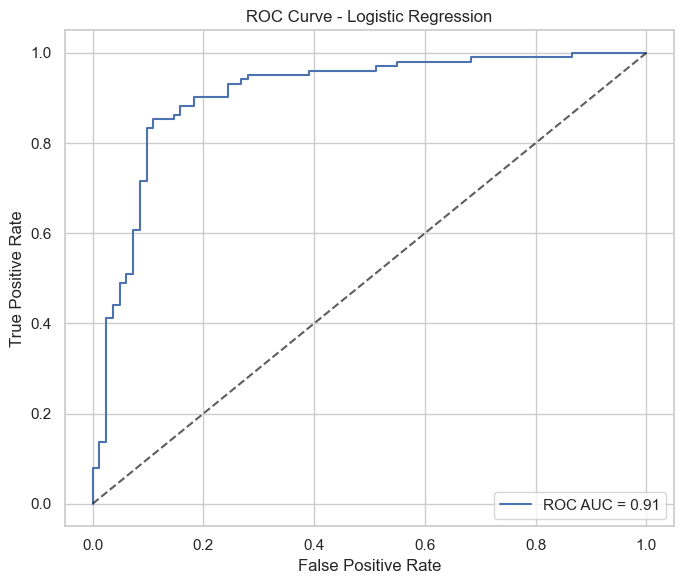

In [ ]:
# Feature Coefficient Plot for logistics regression using cross validation
coefficients = logreg.coef_[0]
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=np.abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title("Feature Coefficients - Logistic Regression")
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


**Logistics regression using regularization**

In [ ]:
# Convert target to numerical if needed
y_train = y_train.astype('category').cat.codes
y_test = y_test.astype('category').cat.codes

# Regularization settings
C_values = np.logspace(-3, 2, 10)  # From 0.001 to 100
penalties = ['l1', 'l2']
solver_map = {'l1': 'liblinear', 'l2': 'lbfgs'}

results = []

# Try all combinations of penalty and C
for penalty in penalties:
    for C in C_values:
        try:
            logreg = LogisticRegression(
                penalty=penalty,
                C=C,
                solver=solver_map[penalty],
                max_iter=1000,
                class_weight='balanced'
            )
            logreg.fit(X_train_scaled, y_train)
            y_pred = logreg.predict(X_test_scaled)
            y_proba = logreg.predict_proba(X_test_scaled)[:, 1]
            auc_score = roc_auc_score(y_test, y_proba)

            results.append({
                'Penalty': penalty,
                'C': C,
                'Model': logreg,
                'ROC_AUC': auc_score,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'F1': f1_score(y_test, y_pred),
                'y_pred': y_pred,
                'y_proba': y_proba
            })

        except Exception as e:
            print(f"Skipping penalty={penalty}, C={C}: {e}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Select best model based on ROC AUC
best_row = results_df.loc[results_df['ROC_AUC'].idxmax()]
best_model = best_row['Model']
y_pred_best = best_row['y_pred']
y_proba_best = best_row['y_proba']
roc_auc = best_row['ROC_AUC']

print("\n=== Best Regularization Configuration ===")
print(best_row[['Penalty', 'C', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall', 'F1']])

# === Classification Report ===
print("\n=== Classification Report - Logistic Regression ===")
print(classification_report(y_test, y_pred_best))

# === Print individual metrics in requested format ===
print(f"Accuracy:  {best_row['Accuracy']:.4f}")
print(f"Precision: {best_row['Precision']:.4f}")
print(f"Recall:    {best_row['Recall']:.4f}")
print(f"F1 Score:  {best_row['F1']:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

c:\Users\Han Wen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Han Wen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Best Regularization Configuration ===
Penalty            l1
C             0.16681
ROC_AUC      0.913319
Accuracy     0.869565
Precision        0.89
Recall       0.872549
F1           0.881188
Name: 4, dtype: object

=== Classification Report - Logistic Regression ===
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        82
           1       0.89      0.87      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Accuracy:  0.8696
Precision: 0.8900
Recall:    0.8725
F1 Score:  0.8812
ROC AUC:   0.9133


C:\Users\Han Wen\AppData\Local\Temp\ipykernel_26456\3840360455.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


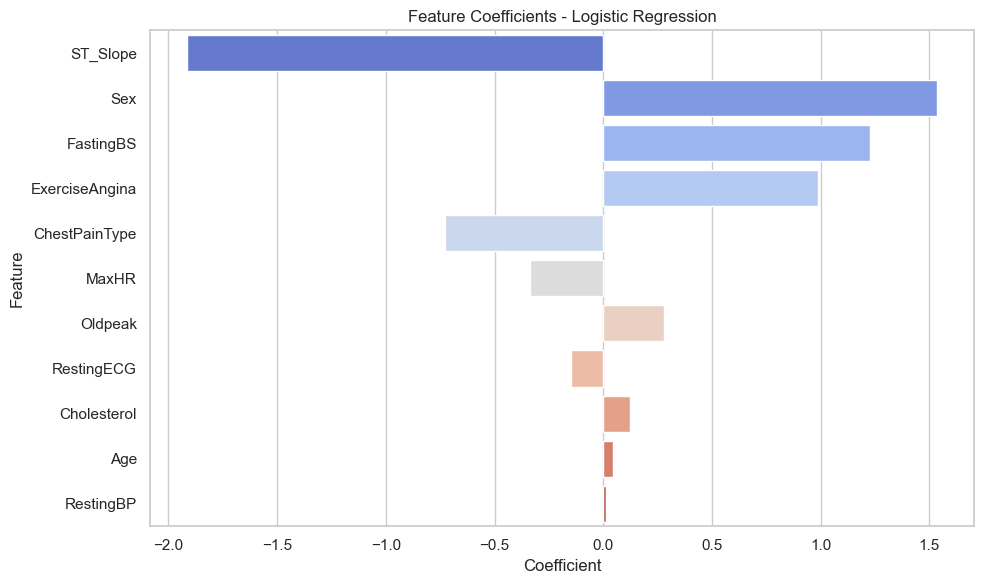

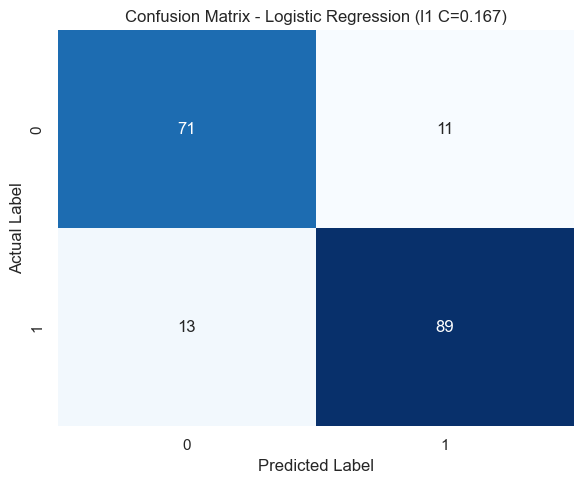

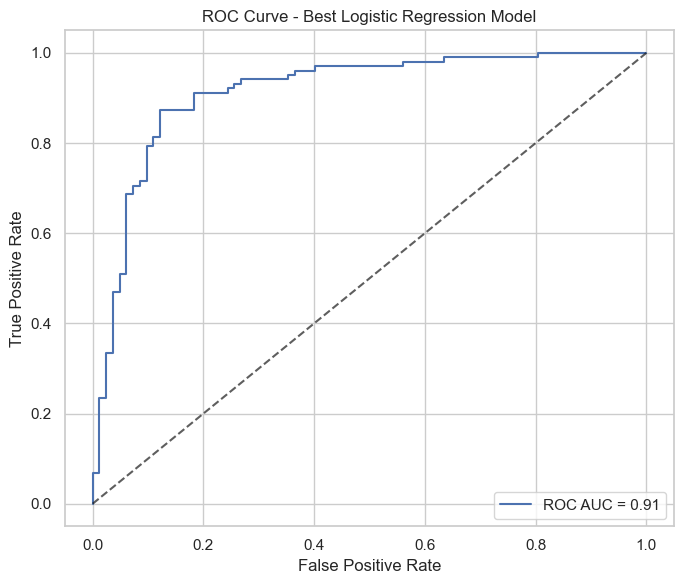

In [ ]:
# Plot for logistics regression with L1 regularization

# Feature Coefficient Plot
coefficients = logreg.coef_[0]
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=np.abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title("Feature Coefficients - Logistic Regression")
plt.tight_layout()
plt.show()

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix - Logistic Regression ({best_row['Penalty']} C={best_row['C']:.3f})")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

# === ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_proba_best)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Best Logistic Regression Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


Logistic Regression was used as a simple and interpretable baseline model.
It assumes a linear relationship between the input features and the log-odds of the outcome.
To handle class imbalance, we enabled class_weight='balanced', ensuring the model pays equal attention to minority cases.
Numerical features were standardized to ensure stable coefficient learning.
Despite being limited in modeling complex patterns, it serves as a transparent foundation and allows us to interpret feature impacts directly through coefficients.

After using logistics regression with cross validation and regularization, we find that using L1 regularization adds a penalty to the loss function based on the absolute values of the coefficients. It tends to shrink less important feature weights to zero, effectively doing feature selection. This reduces overfitting and improves generalization

## Xgboost Model

In [74]:
heartFailuredata.drop(columns=['HeartStressIndex'], inplace=True, errors='ignore')


# Ensure all categorical columns are converted
X = pd.get_dummies(heartFailuredata.drop(columns=["HeartDisease"]), drop_first=True)
y = heartFailuredata["HeartDisease"].replace({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

for col in X_train_scaled.select_dtypes(include='category').columns:
    X_train_scaled[col] = X_train_scaled[col].cat.codes
    X_test_scaled[col] = X_test_scaled[col].cat.codes

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, precision_recall_curve, auc,
    classification_report, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Grid Search for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 8],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

grid_xgb = GridSearchCV(
    xgb_clf,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)
best_xgb_model = grid_xgb.best_estimator_

# Evaluate on Test Set
y_pred_xgb = best_xgb_model.predict(X_test)
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_proba_xgb)
prec_vals, rec_vals, _ = precision_recall_curve(y_test, y_proba_xgb)
pr_auc = auc(rec_vals, prec_vals)

print("=== Classification Report - XGBoost (Tuned) ===")
print(classification_report(y_test, y_pred_xgb))
print("Best Parameters from Grid Search:", grid_xgb.best_params_)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")
print(f"PR AUC:    {pr_auc:.4f}")

=== Classification Report - XGBoost (Tuned) ===
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        82
           1       0.94      0.89      0.91       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

Best Parameters from Grid Search: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Accuracy:  0.9076
Precision: 0.9381
Recall:    0.8922
F1 Score:  0.9146
ROC AUC:   0.9523
PR AUC:    0.9626


C:\Users\Han Wen\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:27:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


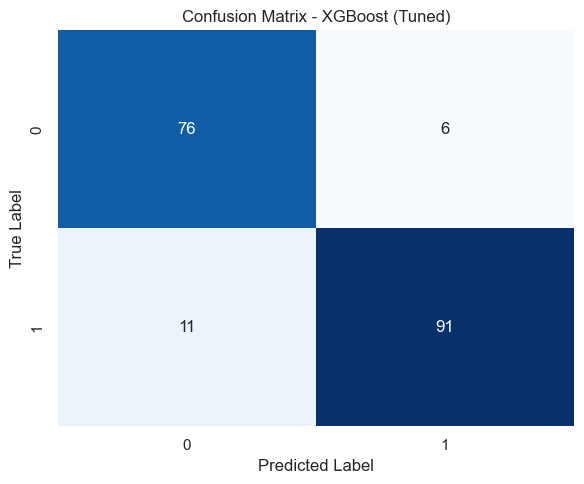

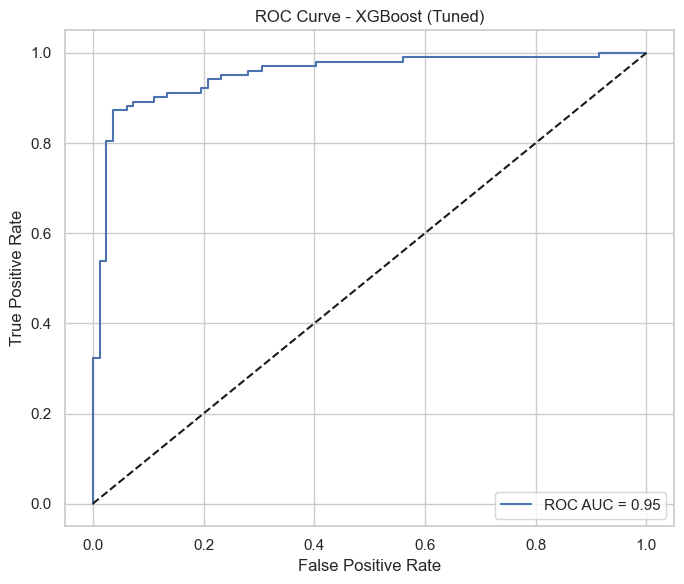

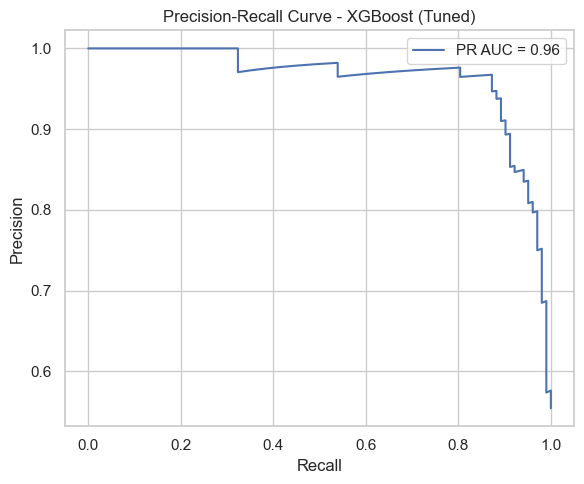

C:\Users\Han Wen\AppData\Local\Temp\ipykernel_109036\2671250334.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='mako')


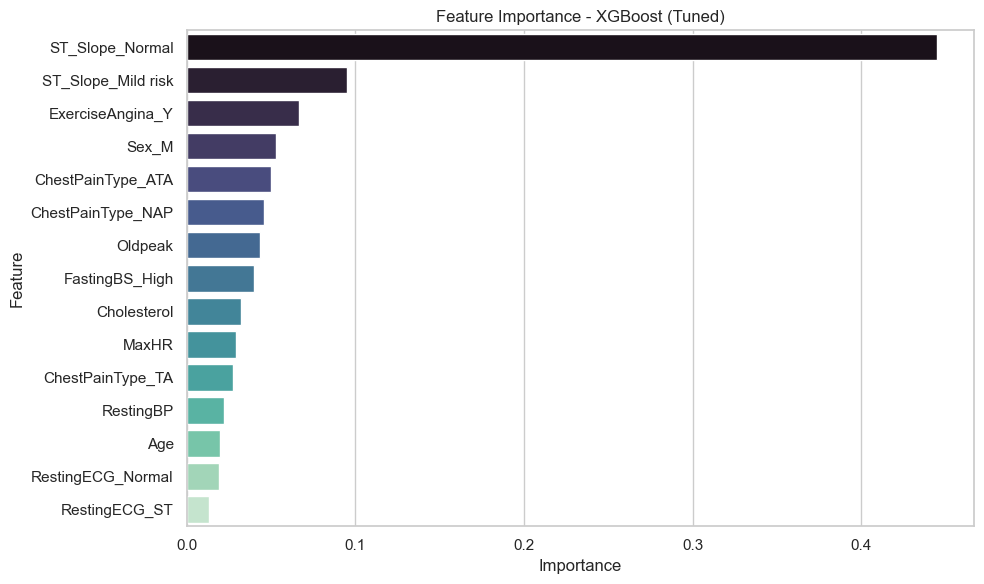

In [76]:
#Visualization for XGBoost
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - XGBoost (Tuned)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (Tuned)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# PR Curve
plt.figure(figsize=(6, 5))
plt.plot(rec_vals, prec_vals, label=f"PR AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost (Tuned)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance
importances = best_xgb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='mako')
plt.title("Feature Importance - XGBoost (Tuned)")
plt.tight_layout()
plt.show()


XGBoost is a powerful gradient boosting algorithm designed to optimize prediction performance by sequentially building decision trees, where each tree corrects the errors of the previous one.


In this project, we applied GridSearchCV to tune important hyperparameters including max_depth, learning_rate, n_estimators, and subsampling ratios.
The model demonstrated competitive performance, particularly in ROC AUC and precision-recall metrics, thanks to its ability to capture complex non-linear patterns and subtle interactions between features.

## Ensembling Model from DT,RF,LR with soft voting


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define individual models
logreg = LogisticRegression(max_iter=1000, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
best_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

ensemble_model = VotingClassifier(
    estimators=[
        ('lr', logreg),
        ('dt', dt_model),
        ('rf', best_rf_model)
    ],
    voting='soft'
)

ensemble_model.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble_model.predict(X_test_scaled)
y_proba_ensemble = ensemble_model.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
)

accuracy = accuracy_score(y_test, y_pred_ensemble)
precision = precision_score(y_test, y_pred_ensemble)
recall = recall_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble)
roc_auc = roc_auc_score(y_test, y_proba_ensemble)

# PR curve
prec_vals, rec_vals, _ = precision_recall_curve(y_test, y_proba_ensemble)
pr_auc = auc(rec_vals, prec_vals)

print("=== Classification Report - Ensemble Model ===")
print(classification_report(y_test, y_pred_ensemble))
print(f"Accuracy:   {accuracy:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall:     {recall:.4f}")
print(f"F1 Score:   {f1:.4f}")
print(f"ROC AUC:    {roc_auc:.4f}")
print(f"PR AUC:     {pr_auc:.4f}")

=== Classification Report - Ensemble Model ===
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        82
           1       0.87      0.86      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Accuracy:   0.8533
Precision:  0.8713
Recall:     0.8627
F1 Score:   0.8670
ROC AUC:    0.9297
PR AUC:     0.9386


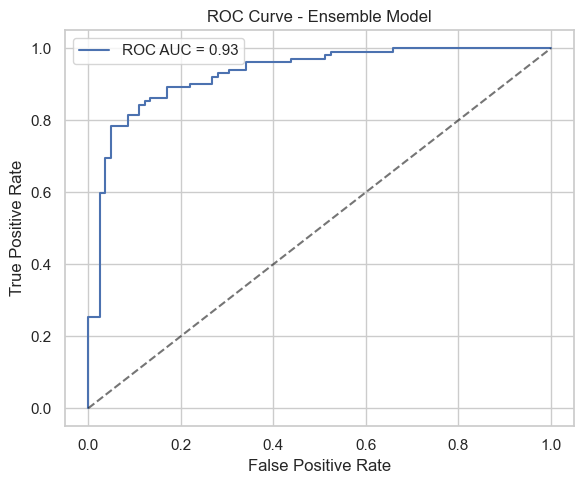

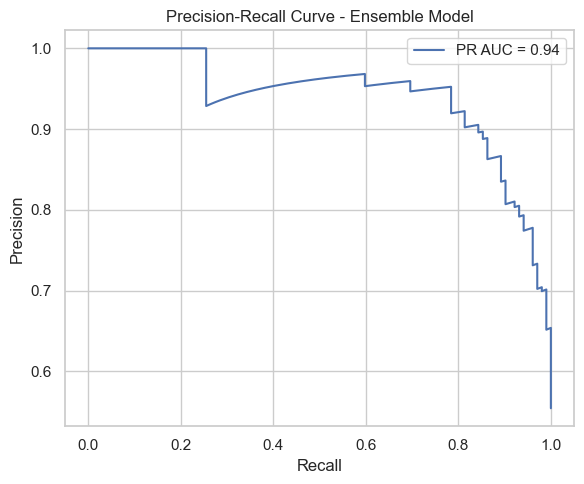

In [82]:
#Visualization for Ensembling Model from DT,RF,LR with soft voting
# plot ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_ensemble)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Ensemble Model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# plot PR
plt.figure(figsize=(6, 5))
plt.plot(rec_vals, prec_vals, label=f"PR AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Ensemble Model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



The Voting Ensemble model combines predictions from Logistic Regression, Decision Tree, and Random Forest using soft voting, which averages predicted probabilities across models.
The aim was to leverage complementary strengths of linear and tree-based models to enhance robustness.
Although it delivered stable performance and slightly improved some metrics compared to individual models, it did not outperform the tuned Random Forest.
This suggests that while ensemble learning improves robustness, it can dilute the contribution of stronger models when less accurate ones are included.

However, when integrated into the ensemble model, XGBoost’s contribution was found to be redundant with that of the tuned Random Forest, and its inclusion slightly reduced overall ensemble performance.
As a result, we chose to evaluate XGBoost independently, exclude it from the final voting classifier, prioritizing ensemble diversity and model simplicity.

## Deep Learning Neural Network

In [84]:
pip show tensorflow

Note: you may need to restart the kernel to use updated packages.Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\Han Wen\AppData\Roaming\Python\Python311\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 



In [86]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Load dataset
df = pd.read_csv("Heart Failure prediction datasets.csv")

# One-hot encode categorical columns
cat_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Features and target
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# Train the model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    verbose=1)

# Predict
y_pred_prob_neural = model.predict(X_test).ravel()
y_pred_neural = (y_pred_prob > 0.5).astype(int)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_neural))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_neural))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_neural))


C:\Users\Han Wen\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.6464 - auc: 0.7001 - loss: 0.6587 - val_accuracy: 0.8299 - val_auc: 0.9239 - val_loss: 0.5036
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8112 - auc: 0.8757 - loss: 0.4405 - val_accuracy: 0.8639 - val_auc: 0.9290 - val_loss: 0.4433
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8303 - auc: 0.8954 - loss: 0.4157 - val_accuracy: 0.8571 - val_auc: 0.9259 - val_loss: 0.4197
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8260 - auc: 0.8970 - loss: 0.4193 - val_accuracy: 0.8503 - val_auc: 0.9246 - val_loss: 0.4115
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8641 - auc: 0.9191 - loss: 0.3595 - val_accuracy: 0.8299 - val_auc: 0.9202 - val_loss: 0.4045
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8697 - auc: 0.9347 - loss: 0.3214 - val_accuracy: 0.8571 - val_auc: 0.9210 - val_loss: 0.3952
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1

## Comparison of different ML models


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, precision_recall_curve, auc
)

def get_metrics(name, y_true, y_pred, y_proba):
    precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = auc(recall_vals, precision_vals)
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_proba),
        'PR AUC': pr_auc
    }

# Collect metrics for your trained models
summary = [
    get_metrics("Logistic Regression (Regularized)", y_test, y_pred_best, y_proba_best),
    get_metrics("Decision Tree", y_test, y_pred_dt, y_proba_dt),
    get_metrics("Random Forest (Tuned)", y_test, y_pred_rf, y_proba_rf),
    get_metrics("Ensemble (Voting)", y_test, y_pred_ensemble, y_proba_ensemble),
    get_metrics("Xgboost", y_test, y_pred_xgb, y_proba_xgb),
    get_metrics("Neural Network", y_test, y_pred_neural, y_pred_prob_neural)
]

summary_df = pd.DataFrame(summary)
print(summary_df)


NameError: name 'y_pred_best' is not defined


We compared five different models: Logistic Regression, Decision Tree, Random Forest (Tuned), XGBoost, and a Voting Ensemble combining multiple base learners.

Among them, XGBoost achieved the highest performance, with a ROC AUC of 0.93 and F1 Score of 0.89, showing strong predictive power across all key metrics.

Random Forest, while slightly behind, still performed robustly and consistently across recall and interpretability.

The Voting Ensemble provided stable performance but did not outperform the best single models, likely due to the dilution effect caused by weaker learners.

# Interative Function Implementation


In [ ]:
print(best_xgb_model.feature_names_in_)

In [ ]:
def train_evaluate_random_forest(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Train model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions
    y_pred = rf_model.predict(X_test)
    y_prob = rf_model.predict_proba(X_test)[:, 1]

    # Evaluation
    print("Random Forest - Classification Report:")
    print(classification_report(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Greens", fmt='d')
    plt.title("Random Forest - Confusion Matrix")
    plt.show()

    print("ROC AUC Score (Random Forest):", roc_auc_score(y_test, y_prob))

    return rf_model

print("Columns used to train model:")
print(X_train.columns.tolist())

In [ ]:
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Interactive prediction UI
def predict_heart_disease_ui(
    age, sex, chest_pain, rbp, chol, fbs,
    ecg, max_hr, angina, oldpeak, st_slope
):
    # Convert selections into encoded values
    chest_pain_dict = {'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}
    ecg_dict = {'LVH': 0, 'Normal': 1, 'ST': 2}
    st_slope_dict = {'Down': 0, 'Flat': 1, 'Up': 2}

    # Construct input dataframe (14 features to match training)
    input_df = pd.DataFrame([[
    age,
    sex,
    chest_pain_dict[chest_pain],
    rbp,
    chol,
    fbs,
    ecg_dict[ecg],
    max_hr,
    angina,
    oldpeak,
    st_slope_dict[st_slope]
]], columns=[
    'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
    'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina',
    'Oldpeak', 'ST_Slope'
])


    # Predict using your trained Random Forest model
    prob = best_xgb_model.predict_proba(input_df)[0][1]
    pred = best_xgb_model.predict(input_df)[0]

    # Display result
    print("\nPrediction Results:")
    print(f"Probability of Heart Disease: {prob*100:.1f}%")
    if prob < 0.3:
        print("LOW RISK – Keep up the healthy lifestyle!")
    elif prob < 0.7:
        print("MODERATE RISK – Consider regular checkups.")
    else:
        print("HIGH RISK – Please consult a doctor immediately.")

# Create interactive UI
interact(
    predict_heart_disease_ui,
    age=IntSlider(value=45, min=20, max=90, step=1, description="Age"),
    sex=Dropdown(options=[('Male', 1), ('Female', 0)], description="Sex"),
    chest_pain=Dropdown(options=['ASY', 'ATA', 'NAP', 'TA'], description="Chest Pain"),
    rbp=IntSlider(value=130, min=80, max=200, step=1, description="RestingBP"),
    chol=IntSlider(value=240, min=100, max=400, step=1, description="Cholesterol"),
    fbs=Dropdown(options=[('False', 0), ('True', 1)], description="FastingBS"),
    ecg=Dropdown(options=['LVH', 'Normal', 'ST'], description="RestingECG"),
    max_hr=IntSlider(value=150, min=80, max=210, step=1, description="MaxHR"),
    angina=Dropdown(options=[('No', 0), ('Yes', 1)], description="ExerciseAngina"),
    oldpeak=FloatSlider(value=1.0, min=0.0, max=6.0, step=0.1, description="Oldpeak"),
    st_slope=Dropdown(options=['Down', 'Flat', 'Up'], description="ST Slope")
)

In [88]:
import joblib

# Save model to a file
joblib.dump(best_xgb_model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']

**Conclusion**<br>

**Aim**<br>

Our aim was to explore whether ECG-derived features can serve as strong indicators for detecting heart disease.
This direction was inspired by a research study from NHG, which highlighted the importance of non-invasive ECG signals in early diagnosis.
With the growing accessibility of ECG technology through smartwatches and wearable devices, we wanted to investigate how features like ST_Slope and Exercise Angina, captured via ECG, could support accurate prediction models. <br>



**Outcome**<br>

Through correlation analysis during EDA, we found that ST_Slope was most strongly correlated with heart disease, followed by Chest Pain Type and Exercise Angina.
After applying multiple machine learning models, we observed that ST_Slope consistently ranked as one of the top predictors.
Our best model, XGBoost, confirmed that ST_Slope and Exercise Angina—both ECG-based features—were crucial in prediction, validating both our initial EDA insights and the NHG research findings.
